# Connecting to drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading data

In [2]:
import pandas as pd
# Read Excel files
finance_data = pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/finance.xlsx")

# adjusted_price= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/adjusted_price.xlsx")
unadjusted_price_1= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_1.xlsx")
unadjusted_price_2= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_2.xlsx")

# adjusted_data_old= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/adjusted_price_old.xlsx")
unadjusted_price_1_old= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_1_old.xlsx")
unadjusted_price_2_old= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_2_old.xlsx")

In [3]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     7725 non-null   object 
 1   Sector     7725 non-null   object 
 2   Year       7725 non-null   int64  
 3   Eps        7457 non-null   float64
 4   PE         5597 non-null   float64
 5   Asst/Shr   7246 non-null   float64
 6   Profit     7016 non-null   float64
 7   Divid%     4484 non-null   float64
 8   Div.Yield  4412 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 543.3+ KB


# Preprocessing

## Combining price data

In [4]:
import pandas as pd
price_data = pd.concat([unadjusted_price_1,unadjusted_price_2,unadjusted_price_1_old,unadjusted_price_2_old], ignore_index=True)
print(price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977284 entries, 0 to 1977283
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Symbol  object 
 1   Date    object 
 2   Open    float64
 3   High    float64
 4   Low     float64
 5   Close   float64
 6   Volume  float64
dtypes: float64(5), object(2)
memory usage: 105.6+ MB
None


## Removing duplicate rows from price data

In [5]:
price_data = price_data.drop_duplicates()
print(price_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1977004 entries, 0 to 1977283
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Symbol  object 
 1   Date    object 
 2   Open    float64
 3   High    float64
 4   Low     float64
 5   Close   float64
 6   Volume  float64
dtypes: float64(5), object(2)
memory usage: 120.7+ MB
None


## Transforming daily price data to yearly price data

In [6]:
import pandas as pd

# Convert 'Date' column to datetime format
price_data['Date'] = pd.to_datetime(price_data['Date'])

# Sort price_data by 'Date' and 'Symbol'
price_data.sort_values(by=['Symbol', 'Date'], inplace=True)

# Extract year from the 'Date' column
price_data['Year'] = price_data['Date'].dt.year

# Group by 'Symbol' and 'Year', aggregate the data
yearly_price_data = price_data.groupby(['Symbol', 'Year']).agg({
    'Open': 'first',  # First open price of the year
    'Close': 'last',  # Last close price of the year
    'Volume': 'sum'   # Total volume for the year
}).reset_index()

# Calculate return
yearly_price_data['Return'] = ((yearly_price_data['Close'] - yearly_price_data['Open']) / yearly_price_data['Open'])

# Rename columns
yearly_price_data.rename(columns={'Open': 'Open_Price', 'Close': 'Close_Price'}, inplace=True)

# Reorder columns
yearly_price_data = yearly_price_data[['Symbol', 'Year', 'Open_Price', 'Close_Price', 'Return', 'Volume']]

# Print the resulting DataFrame
print(yearly_price_data)
print(yearly_price_data.info())

          Symbol  Year  Open_Price  Close_Price    Return       Volume
0      1JANATAMF  2010        10.6         13.0  0.226415  127410500.0
1      1JANATAMF  2011        10.7          8.9 -0.168224  184654000.0
2      1JANATAMF  2012         9.0          7.0 -0.222222  123479500.0
3      1JANATAMF  2013         7.1          6.0 -0.154930  172294000.0
4      1JANATAMF  2014         6.0          5.1 -0.150000  130095110.0
...          ...   ...         ...          ...       ...          ...
6827  ZEALBANGLA  2020        31.4        145.8  3.643312    4586043.0
6828  ZEALBANGLA  2021       150.0        116.1 -0.226000    1943312.0
6829  ZEALBANGLA  2022       120.3        172.5  0.433915    1910270.0
6830  ZEALBANGLA  2023       170.8        140.4 -0.177986    2633597.0
6831  ZEALBANGLA  2024       135.1        131.9 -0.023686     258282.0

[6832 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6832 entries, 0 to 6831
Data columns (total 6 columns):
 #   Column      

## Handling null rows of finance data

In [7]:
# Drop rows where all values except "Symbol", "Sector", "Year", "Div.Yield" are null
columns_to_keep = ['Symbol', 'Sector', 'Year']
columns_to_drop = finance_data.columns.difference(columns_to_keep)
finance_data.dropna(subset=columns_to_drop, how='all', inplace=True)

In [8]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7700 entries, 0 to 7724
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     7700 non-null   object 
 1   Sector     7700 non-null   object 
 2   Year       7700 non-null   int64  
 3   Eps        7457 non-null   float64
 4   PE         5597 non-null   float64
 5   Asst/Shr   7246 non-null   float64
 6   Profit     7016 non-null   float64
 7   Divid%     4484 non-null   float64
 8   Div.Yield  4412 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 601.6+ KB


## Merging finance and yearly price dataframes

In [9]:
# Merge the dataframes on Symbol and Year
merged_data = pd.merge(finance_data, yearly_price_data, on=["Symbol", "Year"])

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       5067 non-null   object 
 1   Sector       5067 non-null   object 
 2   Year         5067 non-null   int64  
 3   Eps          4893 non-null   float64
 4   PE           3992 non-null   float64
 5   Asst/Shr     4743 non-null   float64
 6   Profit       4598 non-null   float64
 7   Divid%       3284 non-null   float64
 8   Div.Yield    3293 non-null   float64
 9   Open_Price   5067 non-null   float64
 10  Close_Price  5067 non-null   float64
 11  Return       5067 non-null   float64
 12  Volume       5067 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 514.7+ KB


In [11]:
print(merged_data.columns)

Index(['Symbol', 'Sector', 'Year', 'Eps', 'PE', 'Asst/Shr', 'Profit', 'Divid%',
       'Div.Yield', 'Open_Price', 'Close_Price', 'Return', 'Volume'],
      dtype='object')


## Handling null cells

In [12]:
#replace null values of certain columns with 0
columns_to_replace = ["Eps", "PE", "Divid%", "Div.Yield", "Profit"]
merged_data[columns_to_replace] = merged_data[columns_to_replace].fillna(0)

In [13]:
#replace null values of a certain column with its mean
merged_data['Asst/Shr'] = merged_data.groupby('Symbol')['Asst/Shr'].transform(lambda x: x.fillna(x.mean()))

In [14]:
#replace null values of certain columns with 0
columns_to_replace = ['Asst/Shr']
merged_data[columns_to_replace] = merged_data[columns_to_replace].fillna(0)

## Selecting columns

In [15]:
# Select relevant columns for the final dataset
final_data = merged_data[["Symbol", "Sector", "Year", "Eps", "PE", "Asst/Shr", "Profit", "Divid%", "Div.Yield", "Volume", "Open_Price", "Close_Price", "Return"]]

# Rename the columns for clarity
final_data.columns = ["Symbol", "Sector", "Year", "Eps", "PE", "Asst/Shr", "Profit", "Divid%", "Div.Yield", "Volume", "Open_Price", "Close_Price", "Return"]

# Display the final dataset
print(final_data.head())

      Symbol       Sector  Year   Eps     PE  Asst/Shr  Profit  Divid%  \
0  1JANATAMF  MutualFunds  2023 -0.32   0.00      9.78  -92.55     0.0   
1  1JANATAMF  MutualFunds  2022  0.24  26.47     10.80   70.10     7.0   
2  1JANATAMF  MutualFunds  2021  2.54   2.76     11.94  735.56    13.0   
3  1JANATAMF  MutualFunds  2020 -1.26  -3.25      9.32 -365.78     0.0   
4  1JANATAMF  MutualFunds  2019  0.28  16.99     10.88   81.92     3.0   

   Div.Yield       Volume  Open_Price  Close_Price    Return  
0       0.00    1694211.0         6.1          6.1  0.000000  
1      10.94   77133290.0         6.3          6.1 -0.031746  
2      18.57  422834271.0         6.1          6.2  0.016393  
3       0.00  624182608.0         4.2          6.0  0.428571  
4       6.25  205832239.0         4.5          4.3 -0.044444  


In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       5067 non-null   object 
 1   Sector       5067 non-null   object 
 2   Year         5067 non-null   int64  
 3   Eps          5067 non-null   float64
 4   PE           5067 non-null   float64
 5   Asst/Shr     5067 non-null   float64
 6   Profit       5067 non-null   float64
 7   Divid%       5067 non-null   float64
 8   Div.Yield    5067 non-null   float64
 9   Volume       5067 non-null   float64
 10  Open_Price   5067 non-null   float64
 11  Close_Price  5067 non-null   float64
 12  Return       5067 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 514.7+ KB


## Correlation

                 Year       Eps        PE  Asst/Shr    Profit    Divid%  \
Year         1.000000 -0.079524  0.083554 -0.023733  0.068556  0.012813   
Eps         -0.079524  1.000000 -0.016692  0.510271  0.264531  0.072669   
PE           0.083554 -0.016692  1.000000  0.087436 -0.026882 -0.005180   
Asst/Shr    -0.023733  0.510271  0.087436  1.000000  0.069578  0.030433   
Profit       0.068556  0.264531 -0.026882  0.069578  1.000000  0.018975   
Divid%       0.012813  0.072669 -0.005180  0.030433  0.018975  1.000000   
Div.Yield   -0.086734  0.122568 -0.072846  0.045015  0.094507  0.008581   
Volume       0.245584 -0.064801 -0.020606 -0.054934  0.086103 -0.009792   
Open_Price  -0.246381  0.372204  0.004195  0.248920  0.062313  0.030012   
Close_Price -0.257636  0.380486  0.005096  0.227448  0.052517  0.032687   
Return      -0.051845  0.004400  0.020325 -0.017968 -0.021568 -0.002311   

             Div.Yield    Volume  Open_Price  Close_Price    Return  
Year         -0.086734  0.245

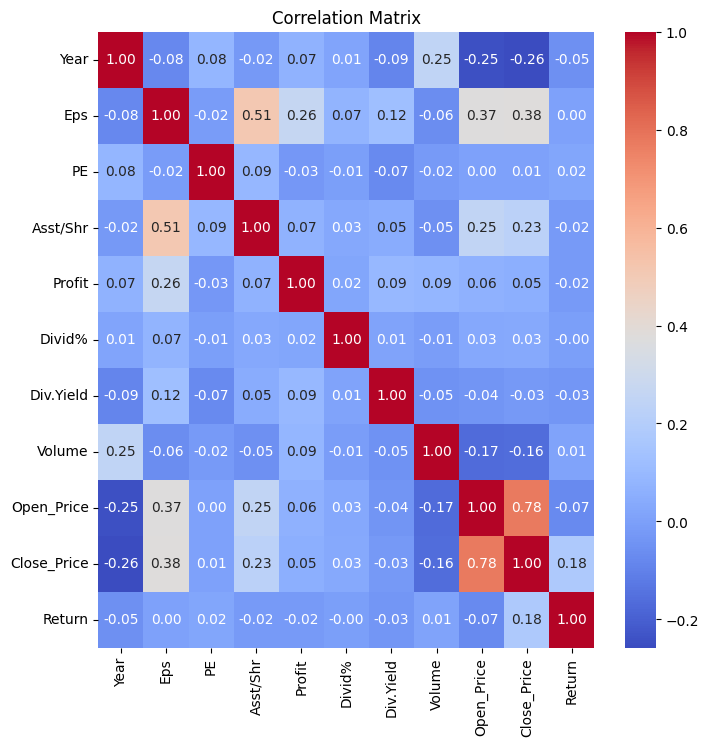

In [17]:
import pandas as pd

# Drop non-numeric columns
numeric_data = final_data.select_dtypes(include=[float, int])

# Fill missing values
numeric_data.fillna(0, inplace=True)

# Or drop rows with missing values
numeric_data.dropna(inplace=True)

correlation_matrix = numeric_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# import pandas as pd

# correlation_matrix = final_data.corr()
# print(correlation_matrix)

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(8, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

## Label

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sort the data by Symbol and Year to ensure chronological order
final_data.sort_values(by=["Symbol", "Year"], inplace=True)

# Shift the Stock Return column to get the next year's return as the target variable
final_data["Next Year's Return"] = final_data.groupby("Symbol")["Return"].shift(-3)

# Drop rows where Next Year's Stock Return is NaN (since we can't predict those)
final_data.dropna(subset=["Next Year's Return"], inplace=True)

# Count the number of unique symbols
unique_symbols = final_data['Symbol'].nunique()
print("Number of unique symbols:", unique_symbols)

# Count the number of unique sectors
unique_sectors = final_data['Sector'].nunique()
print("Number of unique sectors:", unique_sectors)

final_data=final_data.drop(columns=["Symbol"])
print(final_data.info())

Number of unique symbols: 353
Number of unique sectors: 18
<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 12 to 5048
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sector              3947 non-null   object 
 1   Year                3947 non-null   int64  
 2   Eps                 3947 non-null   float64
 3   PE                  3947 non-null   float64
 4   Asst/Shr            3947 non-null   float64
 5   Profit              3947 non-null   float64
 6   Divid%              3947 non-null   float64
 7   Div.Yield           3947 non-null   float64
 8   Volume              3947 non-null   float64
 9   Open_Price          3947 non-null   float64
 10  Close_Price         3947 non-null   float64
 11  Return              3947 non-null   float64
 12  Next Year's Return  3947 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 431.7+ KB
None


## Encoding categorical data

In [20]:
# encoding categorical data
final_data = pd.get_dummies(final_data, columns=['Sector'])
print(final_data.info())

# Write the final dataset to a new Excel file
final_data.to_excel("merged_data.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 12 to 5048
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              3947 non-null   int64  
 1   Eps                               3947 non-null   float64
 2   PE                                3947 non-null   float64
 3   Asst/Shr                          3947 non-null   float64
 4   Profit                            3947 non-null   float64
 5   Divid%                            3947 non-null   float64
 6   Div.Yield                         3947 non-null   float64
 7   Volume                            3947 non-null   float64
 8   Open_Price                        3947 non-null   float64
 9   Close_Price                       3947 non-null   float64
 10  Return                            3947 non-null   float64
 11  Next Year's Return                3947 non-null   float64
 12  Sector_Ban

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.085137  0.058766 -0.020270   
Eps                              -0.085137  1.000000 -0.011470  0.474037   
PE                                0.058766 -0.011470  1.000000  0.070613   
Asst/Shr                         -0.020270  0.474037  0.070613  1.000000   
Profit                            0.076715  0.253059 -0.038112  0.056248   
Divid%                            0.021570  0.048609 -0.007188  0.017790   
Div.Yield                        -0.129238  0.096485 -0.087857  0.020653   
Volume                            0.330656 -0.065187 -0.031161 -0.050318   
Open_Price                       -0.237613  0.358138  0.025423  0.265278   
Close_Price                      -0.260267  0.360241  0.020965  0.235182   
Return                           -0.109300  0.011841  0.044807 -0.018374   
Next Year's Return               -0.012689 -0.054182 -0.008802 -0.025190   
Sector_Bank 

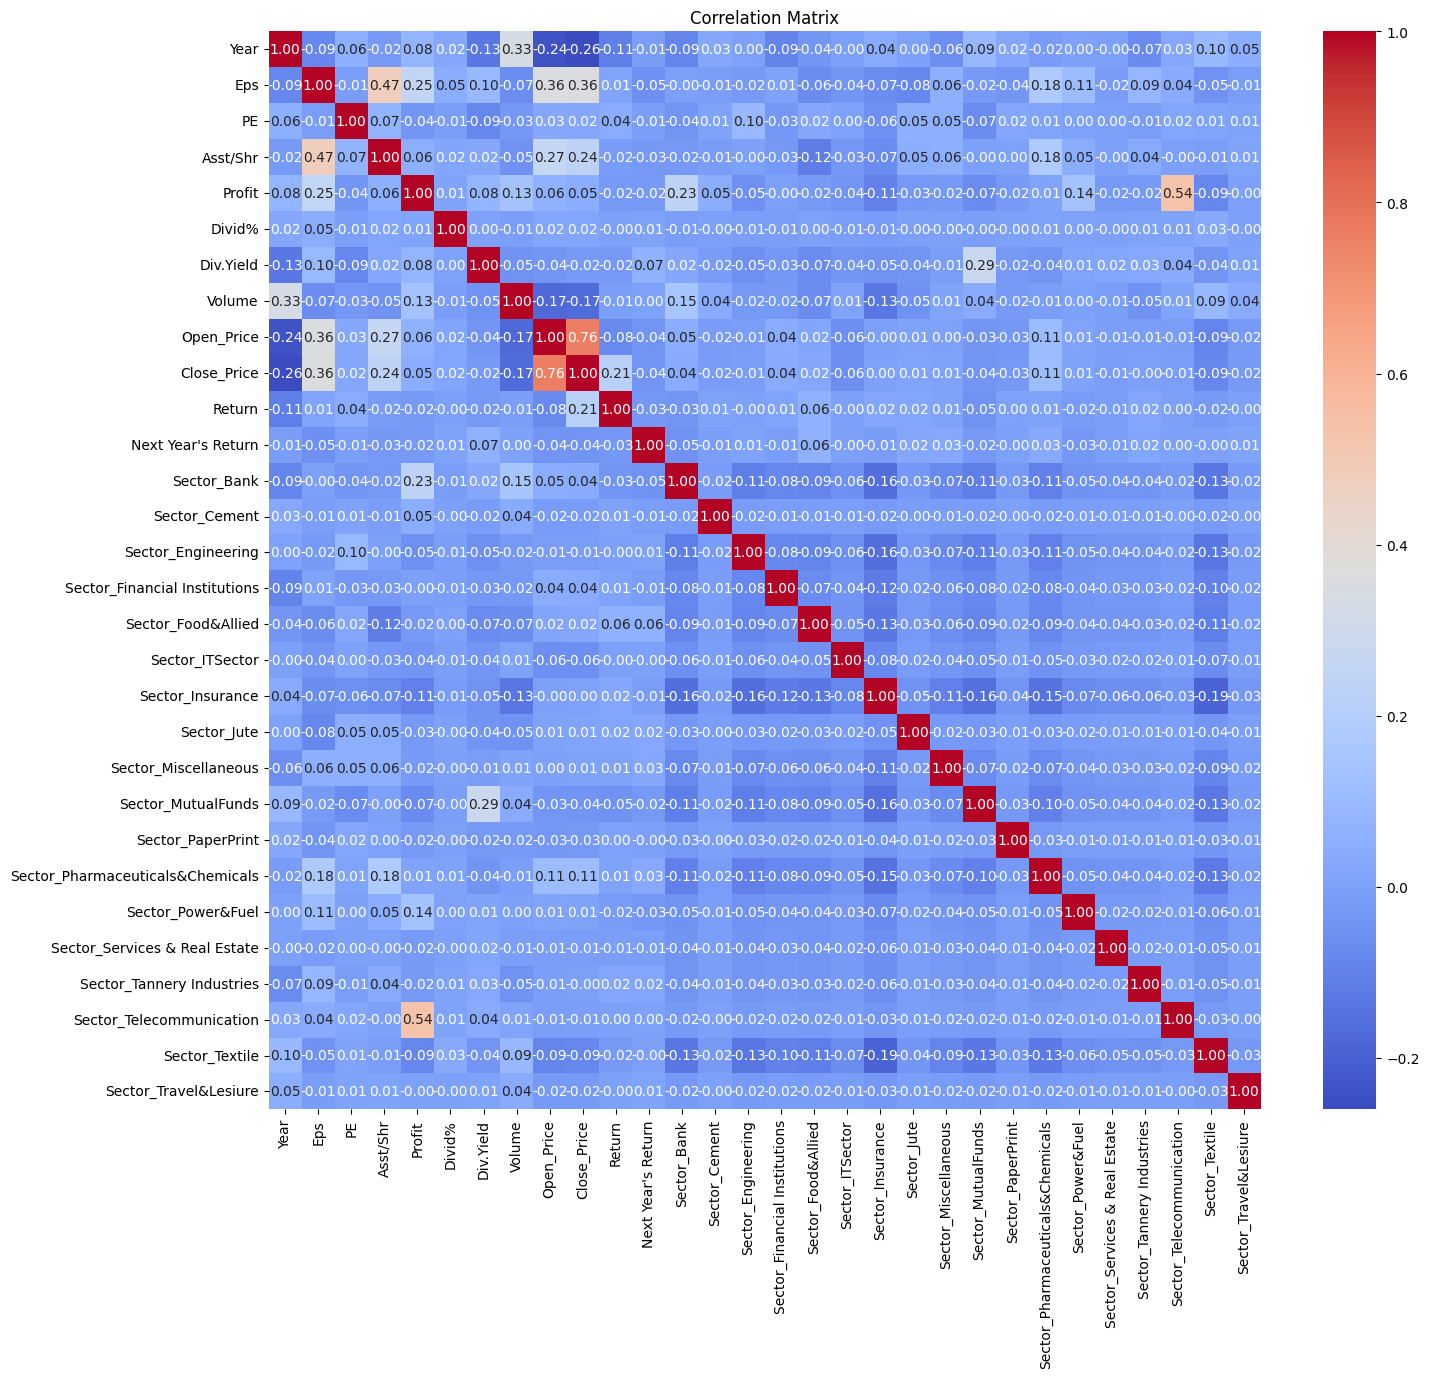

In [21]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Train test split

### Train test split if done randomly (commented out)

In [22]:
# # Select features (X) and target variable (y)
# X = final_data.drop(columns=["Next Year's Total Stock Return"])  # Features excluding the target variable and the current year's return
# y = final_data["Next Year's Total Stock Return"]  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Train test split if latest data in test set

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sort the data by the "Year" column in descending order ("Year" is the column indicating time)
final_data_sorted = final_data.sort_values(by="Year", ascending=False)

# Calculate the index where 20% of the data lies
test_index = int(0.2 * len(final_data_sorted))

# Split the data into training and testing sets
X_train = final_data_sorted.iloc[test_index:]  # Use data from the test_index onwards for training
X_test = final_data_sorted.iloc[:test_index]  # Use data up to the test_index for testing

# Separate the target variable
y_train = X_train["Next Year's Return"]
y_test = X_test["Next Year's Return"]

# Drop the target variable from the feature sets
X_train = X_train.drop(columns=["Next Year's Return"])
X_test = X_test.drop(columns=["Next Year's Return"])

### Mean and stddev of prediction

In [24]:
final_data_sorted["Next Year's Return"].mean()
print("dataset Return mean: ", final_data_sorted["Next Year's Return"].mean())
print("dataset Return median: ", final_data_sorted["Next Year's Return"].median())
print("dataset Return std dev: ", final_data_sorted["Next Year's Return"].std())

print("y_train mean: ", y_train.mean())
print("y_train median: ", y_train.median())
print("y_train std dev: ", y_train.std())

print("y_test mean: ", y_test.mean())
print("y_test median: ", y_test.median())
print("y_test std dev: ", y_test.std())

dataset Return mean:  0.07038566103330181
dataset Return median:  -0.023066485753052916
dataset Return std dev:  0.617498020697155
y_train mean:  0.0528899864936521
y_train median:  -0.050116321529270445
y_train std dev:  0.6328723705492977
y_test mean:  0.140412708176792
y_test median:  0.0
y_test std dev:  0.5464745678454782


In [25]:
print(X_train.shape)
print(X_test.shape)

(3158, 29)
(789, 29)


In [26]:
# X.info()
final_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 2331 to 3037
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              3947 non-null   int64  
 1   Eps                               3947 non-null   float64
 2   PE                                3947 non-null   float64
 3   Asst/Shr                          3947 non-null   float64
 4   Profit                            3947 non-null   float64
 5   Divid%                            3947 non-null   float64
 6   Div.Yield                         3947 non-null   float64
 7   Volume                            3947 non-null   float64
 8   Open_Price                        3947 non-null   float64
 9   Close_Price                       3947 non-null   float64
 10  Return                            3947 non-null   float64
 11  Next Year's Return                3947 non-null   float64
 12  Sector_B

## Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.iloc[:, 1:11] = scaler.fit_transform(X_train.iloc[:, 1:11])
X_test.iloc[:, 1:11] = scaler.transform(X_test.iloc[:, 1:11])

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Year        Eps        PE  Asst/Shr    Profit    Divid%  Div.Yield  \
935   2018  -0.292478 -0.033438 -0.079813 -0.203384 -0.323916  -0.682654   
387   2018  -1.099847 -0.331182 -0.184395 -0.618391 -0.323916  -0.682654   
798   2018  14.602101 -0.291706  4.470336  7.078415  7.580333   1.998069   
5     2018  -0.308643 -0.248215 -0.250974 -0.119581 -0.292299   0.169584   
550   2018  -0.122741  0.472792  0.175799 -0.272042 -0.007746  -0.381864   
...    ...        ...       ...       ...       ...       ...        ...   
4929  2000   0.301150 -0.266280  0.108140 -0.270356 -0.086788   0.385941   
1164  2000   0.424186 -0.258653  0.472753 -0.290014 -0.323916   0.399134   
4063  2000   0.341564 -0.226403  0.337238 -0.262371  0.150339   0.567998   
2357  2000   0.122433  0.370154 -0.077653 -0.174174 -0.007746  -0.503235   
3037  2000  -0.234103 -0.225466 -0.254607 -0.269112 -0.165831   1.317334   

        Volume  Open_Price  Close_Price  ...  Sector_Miscellaneous  \
935   2.346297   

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.085137  0.058766 -0.020270   
Eps                              -0.085137  1.000000 -0.011470  0.474037   
PE                                0.058766 -0.011470  1.000000  0.070613   
Asst/Shr                         -0.020270  0.474037  0.070613  1.000000   
Profit                            0.076715  0.253059 -0.038112  0.056248   
Divid%                            0.021570  0.048609 -0.007188  0.017790   
Div.Yield                        -0.129238  0.096485 -0.087857  0.020653   
Volume                            0.330656 -0.065187 -0.031161 -0.050318   
Open_Price                       -0.237613  0.358138  0.025423  0.265278   
Close_Price                      -0.260267  0.360241  0.020965  0.235182   
Return                           -0.109300  0.011841  0.044807 -0.018374   
Next Year's Return               -0.012689 -0.054182 -0.008802 -0.025190   
Sector_Bank 

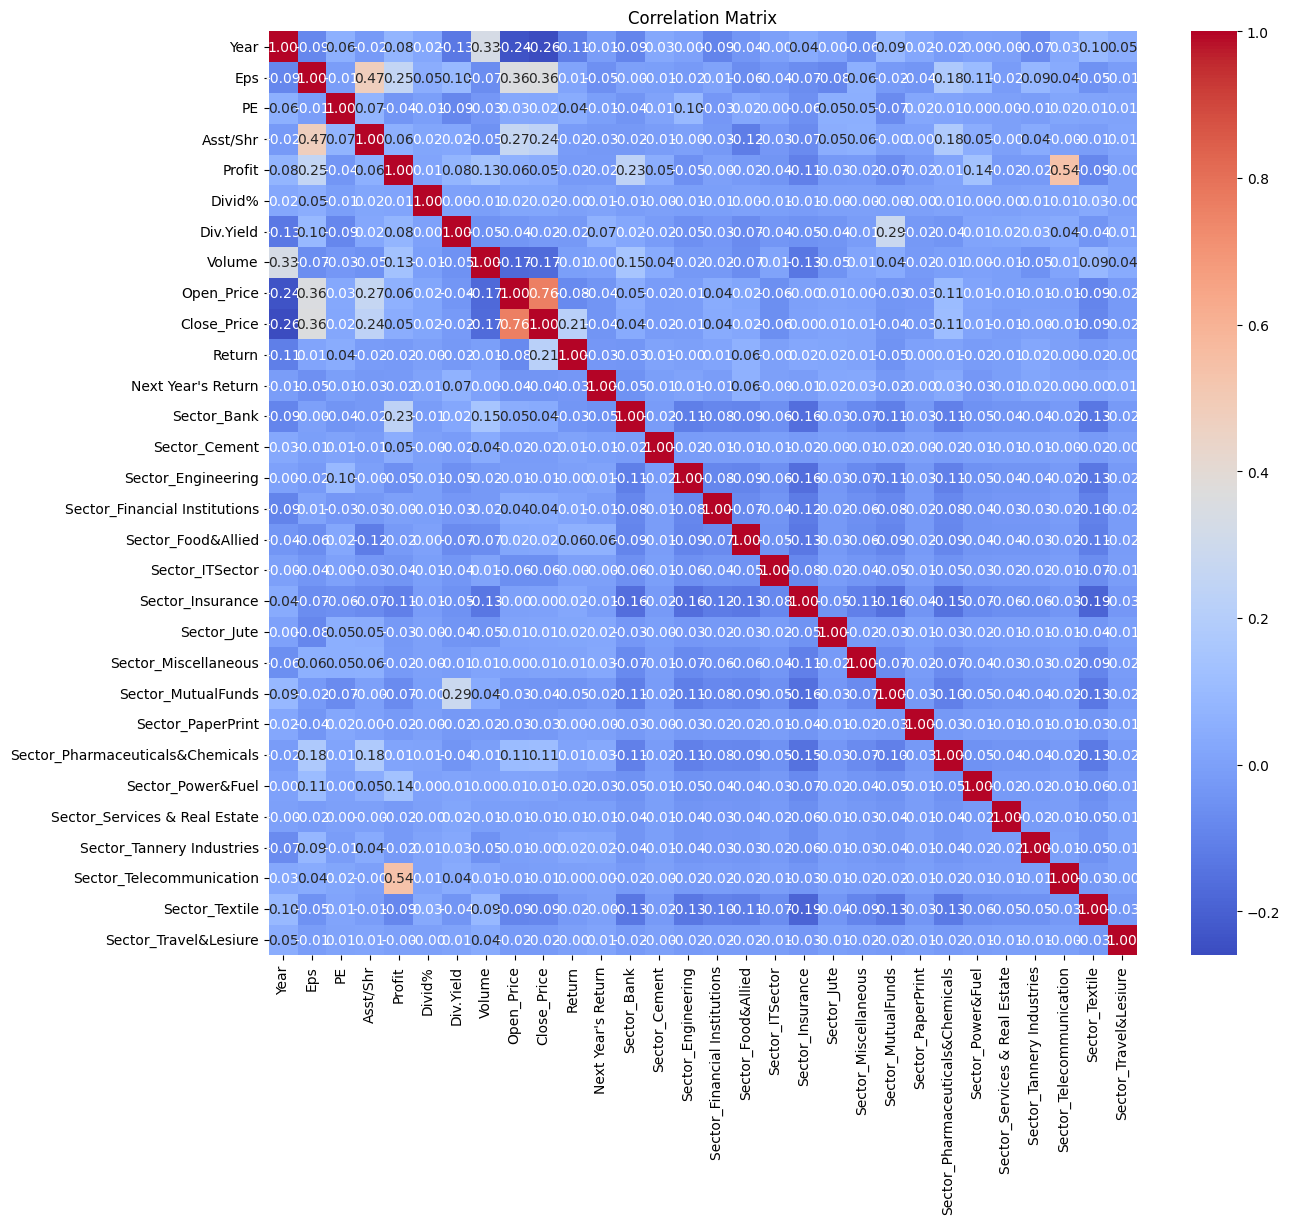

In [28]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Training Models

## Linear regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_train, y_pred_train)
print("Train MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Train RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_train, y_pred_train)
print("Train MAE_linear_regression:", mae_linear_regression)

# # Calculate MAPE_linear_regression
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_linear_regression = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_linear_regression:", mape_linear_regression)

# # Calculate Median APE_linear_regression
# median_ape_train_linear_regression = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_linear_regression:", median_ape_train_linear_regression)

# # Calculate R-squared_linear_regression
# r2_linear_regression = r2_score(y_train, y_pred_train)
# print("Train R-squared_linear_regression:", r2_linear_regression)

# # Calculate Adjusted R-squared_linear_regression
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_test, y_pred_test)
print("Test MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Test RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_linear_regression:", mae_linear_regression)

# # Calculate MAPE_linear_regression
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_linear_regression = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_linear_regression:", mape_linear_regression)

# # Calculate Median APE_linear_regression
# median_ape_linear_regression = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_linear_regression:", median_ape_linear_regression)

# # Calculate R-squared_linear_regression
# r2_linear_regression = r2_score(y_test, y_pred_test)
# print("Test R-squared_linear_regression:", r2_linear_regression)

# # Calculate Adjusted R-squared_linear_regression
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

Train MSE_linear_regression: 0.38784513546918137
Train RMSE_linear_regression: 0.6227721376789278
Train MAE_linear_regression: 0.383593329896133

Test MSE_linear_regression: 2.7909908252372047
Test RMSE_linear_regression: 1.6706258782974734
Test MAE_linear_regression: 0.34497515913339444


## SVR

In [30]:
from sklearn.svm import SVR

# Train a SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train.ravel())

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_SVR:", median_ape_train_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_train, y_pred_train)
# print("Train R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_SVR:", median_ape_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_test, y_pred_test)
# print("Test R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

<ipython-input-30-115037ba6cd4>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


train MSE_SVR: 0.41029475916033153
train RMSE_SVR: 0.6405425506243372
train MAE_SVR: 0.3779232868406178

Test MSE: 0.33351288199141044
Test RMSE_SVR: 0.5775057419553596
Test MAE_SVR: 0.2863535309480665


In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model
model = SVR()

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Regularization parameter
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5], # Margin of tolerance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Instantiate SVR with best hyperparameters
best_model = SVR(**best_params)

# Train the model with best hyperparameters
best_model.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 63 candidates, totalling 315 fits


<ipython-input-31-6390c9df7a4e>:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train, y_train.ravel())


[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.6s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   1.0s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.9s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.9s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   1.0s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.9s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.5s
[CV] END ..................C

<ipython-input-31-6390c9df7a4e>:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_model.fit(X_train, y_train.ravel())


SVR(C=0.001, epsilon=0.5)

In [32]:
# Make predictions on the training set
y_pred_train = best_model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_SVR:", median_ape_train_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_train, y_pred_train)
# print("Train R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_SVR:", median_ape_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_test, y_pred_test)
# print("Test R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

train MSE_SVR: 0.4009940303258625
train RMSE_SVR: 0.633240894388433
train MAE_SVR: 0.3950892026004838

Test MSE: 0.30224537002850504
Test RMSE_SVR: 0.5497684694746553
Test MAE_SVR: 0.2884764700952762


## Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("train MSE:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("train RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_RFR:", mae_RFR)

# # Calculate MAPE_RFR
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_RFR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_RFR:", mape_RFR)

# # Calculate Median APE_RFR
# median_ape_train_RFR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_RFR:", median_ape_train_RFR)

# # Calculate R-squared_RFR
# r2_RFR = r2_score(y_train, y_pred_train)
# print("Train R-squared_RFR:", r2_RFR)

# # Calculate Adjusted R-squared_RFR
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_RFR:", adjusted_r2_RFR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE_RFR:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_RFR:", mae_RFR)

# # Calculate MAPE_RFR
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_RFR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_RFR:", mape_RFR)

# # Calculate Median APE_RFR
# median_ape_RFR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_RFR:", median_ape_RFR)

# # Calculate R-squared_RFR
# r2_RFR = r2_score(y_test, y_pred_test)
# print("Test R-squared_RFR:", r2_RFR)

# # Calculate Adjusted R-squared_RFR
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

train MSE: 0.047820412478572764
train RMSE_RFR: 0.21867878835994306
train MAE_RFR: 0.12339206489051699

Test MSE_RFR: 0.3534162640928042
Test RMSE_RFR: 0.5944882371357773
Test MAE_RFR: 0.3901785830490315


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a Random Forest Regression model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Train RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("Train MAE:", mae_RFR)

print()

# Make predictions on the testing set
y_pred_test = best_rf_model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_RFR)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Train MSE: 0.10447615787884944
Train RMSE: 0.32322771830220476
Train MAE: 0.1604097402098281

Test MSE: 0.34266368931163227
Test RMSE: 0.5853748280474932
Test MAE: 0.38648820542005813


## LSTM

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3158, 29)
(789, 29)
(3158,)
(789,)


In [36]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define time steps and calculate features per timestep
timesteps = 1
features_per_timestep = X_train.shape[1] // timesteps

# Convert DataFrames to NumPy arrays and reshape
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, features_per_timestep)

# Convert features to float32
X_train_reshaped = X_train_reshaped.astype(np.float32)
X_test_reshaped = X_test_reshaped.astype(np.float32)

# Convert labels to binary and float32 for compatibility with TensorFlow
y_train = (y_train > 0.5).astype(np.float32)  # Ensure binary values 0.0 or 1.0
y_test = (y_test > 0.5).astype(np.float32)

# Initialize the RNN model
model = Sequential()

# Add input and LSTM layers
model.add(Input(shape=(timesteps, features_per_timestep)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Evaluate and make predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))

# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
# print("Train MAPE:", mape_train)
# print("Train Median APE:", median_ape_train)
# print("Train R-squared:", r2_train)
# print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluation metrics for test set
mse_LSTM = mean_squared_error(y_test, y_pred_test)
rmse_LSTM = sqrt(mse_LSTM)
mae_LSTM = mean_absolute_error(y_test, y_pred_test)
mape_LSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
median_ape_LSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
r2_LSTM = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_LSTM = 1 - (1 - r2_LSTM) * ((n_test - 1) / (n_test - p_test - 1))

# Print test metrics
print("Test MSE:", mse_LSTM)
print("Test RMSE:", rmse_LSTM)
print("Test MAE:", mae_LSTM)
# print("Test MAPE:", mape_LSTM)
# print("Test Median APE:", median_ape_LSTM)
# print("Test R-squared:", r2_LSTM)
# print("Test Adjusted R-squared:", adjusted_r2_LSTM)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1176 - mean_squared_error: 0.1176
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1211 - mean_squared_error: 0.1211
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1198 - mean_squared_error: 0.1198
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1156 - mean_squared_error: 0.1156
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1143 - mean_squared_error: 0.1143
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

## BiLSTM

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt

# Ensure data is in correct numeric format
X_train_reshaped = np.array(X_train, dtype=np.float32).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test, dtype=np.float32).reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Initialize the BiLSTM model
model = Sequential()

# Adding the input layer and the BiLSTM layers
model.add(Input(shape=(1, X_train.shape[1])))  # Explicit input definition
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))  # Output layer

# Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the Training set
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Making predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))
# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
# print("Train MAPE:", mape_train)
# print("Train Median APE:", median_ape_train)
# print("Train R-squared:", r2_train)
# print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluate testing performance
mse_biLSTM = mean_squared_error(y_test, y_pred_test)
print('Test MSE_biLSTM:', mse_biLSTM)

rmse_biLSTM = sqrt(mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)

mae_biLSTM = mean_absolute_error(y_test, y_pred_test)
print('Test MAE_biLSTM:', mae_biLSTM)

# epsilon = 1e-10  # Small constant to avoid division by zero
# mape_biLSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print('Test MAPE_biLSTM:', mape_biLSTM)

# median_ape_biLSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_biLSTM:", median_ape_biLSTM)

# r2_biLSTM = r2_score(y_test, y_pred_test)
# print('Test R2_biLSTM:', r2_biLSTM)

# n = X_test.shape[0]
# p = X_test.shape[1]
# adjusted_r2_biLSTM = 1 - (1 - r2_biLSTM) * (n - 1) / (n - p - 1)
# print('Test Adjusted R2_biLSTM:', adjusted_r2_biLSTM)


Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1203
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1214
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1157
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1207
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1189
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1256
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1218
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1217
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1211
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1212
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1164
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1194
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1159
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1186
Epoch 15/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1287
Epoch 16/20
99/99

# Model Comparison

In [38]:
print("Linear Regression")
print('Test MSE_linear_regression:', mse_linear_regression)
print('Test RMSE_linear_regression:', rmse_linear_regression)
print('Test MAE_linear_regression:', mae_linear_regression)
# print('Test MAPE_linear_regression:', mape_linear_regression)
# print("Test Median APE_linear_regression:", median_ape_linear_regression)
# print("Test R-squared_linear_regression:", r2_linear_regression)
# print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print("\nSVR")
print('Test MSE_SVR:', mse_SVR)
print('Test RMSE_SVR:', rmse_SVR)
print('Test MAE_SVR:', mae_SVR)
# print('Test MAPE_SVR:', mape_SVR)
# print("Test Median APE_SVR:", median_ape_SVR)
# print("Test R-squared_SVR:", r2_SVR)
# print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

print("\nRandom Forest Regression")
print('Test MSE_RFR:', mse_RFR)
print('Test RMSE_RFR:', rmse_RFR)
print('Test MAE_RFR:', mae_RFR)
# print('Test MAPE_RFR:', mape_RFR)
# print("Test Median APE_RFR:", median_ape_RFR)
# print("Test R-squared_RFR:", r2_RFR)
# print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

print("\nLSTM")
print('Test MSE_LSTM:', mse_LSTM)
print('Test RMSE_LSTM:', rmse_LSTM)
print('Test MAE_LSTM:', mae_LSTM)
# print('Test MAPE_LSTM:', mape_LSTM)
# print("Test Median APE_LSTM:", median_ape_LSTM)
# print("Test R-squared_LSTM:", r2_LSTM)
# print("Test Adjusted R-squared_LSTM:", adjusted_r2_LSTM)

print("\nBiLSTM")
print('Test MSE_biLSTM:', mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)
print('Test MAE_biLSTM:', mae_biLSTM)
# print('Test MAPE_biLSTM:', mape_biLSTM)
# print('Test median_ape_biLSTM:', median_ape_biLSTM)
# print('Test r2_biLSTM:', r2_biLSTM)
# print('Test adjusted_r2_biLSTM:', adjusted_r2_biLSTM)

Linear Regression
Test MSE_linear_regression: 2.7909908252372047
Test RMSE_linear_regression: 1.6706258782974734
Test MAE_linear_regression: 0.34497515913339444

SVR
Test MSE_SVR: 0.30224537002850504
Test RMSE_SVR: 0.5497684694746553
Test MAE_SVR: 0.2884764700952762

Random Forest Regression
Test MSE_RFR: 0.34266368931163227
Test RMSE_RFR: 0.5853748280474932
Test MAE_RFR: 0.38648820542005813

LSTM
Test MSE_LSTM: 0.10503239184617996
Test RMSE_LSTM: 0.32408701276999663
Test MAE_LSTM: 0.2027003914117813

BiLSTM
Test MSE_biLSTM: 0.10498851537704468
Test RMSE_biLSTM: 0.32401931327784256
Test MAE_biLSTM: 0.20481683313846588


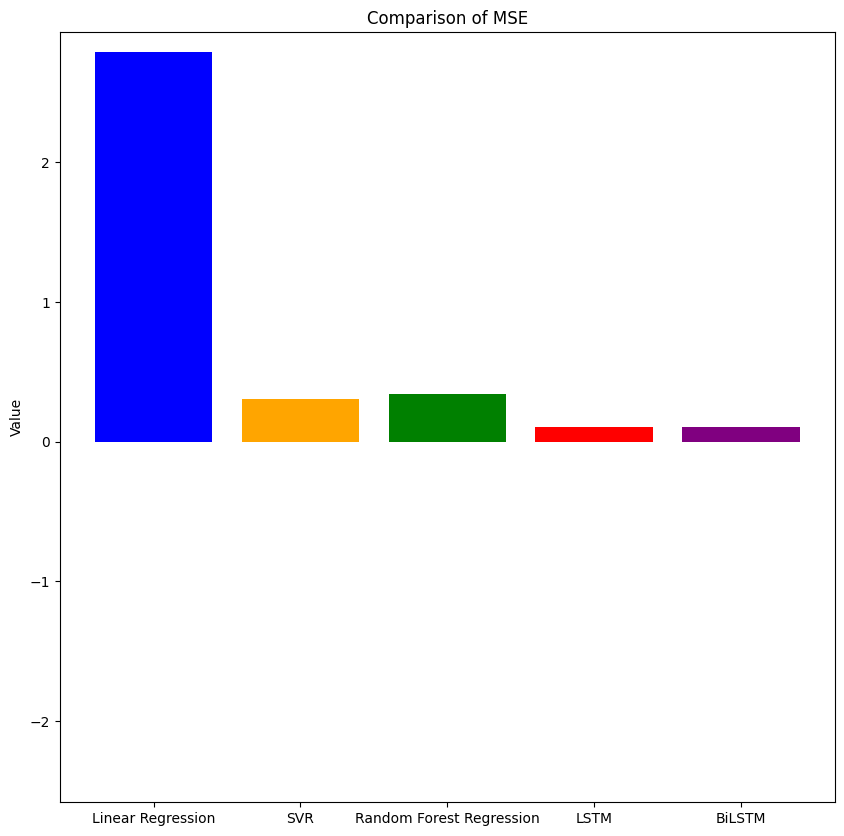

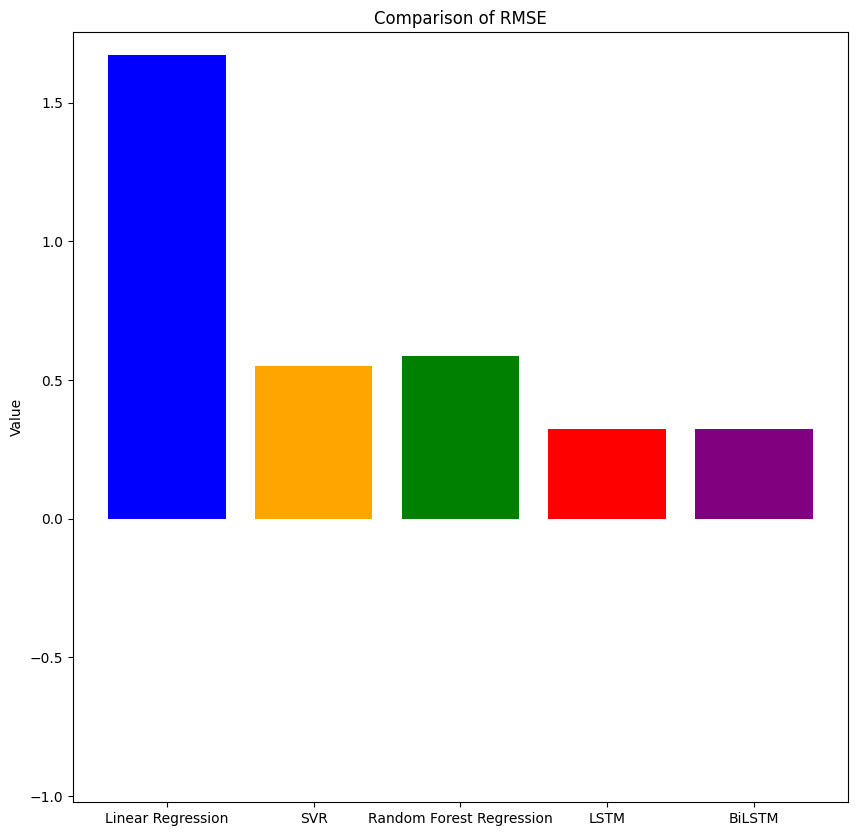

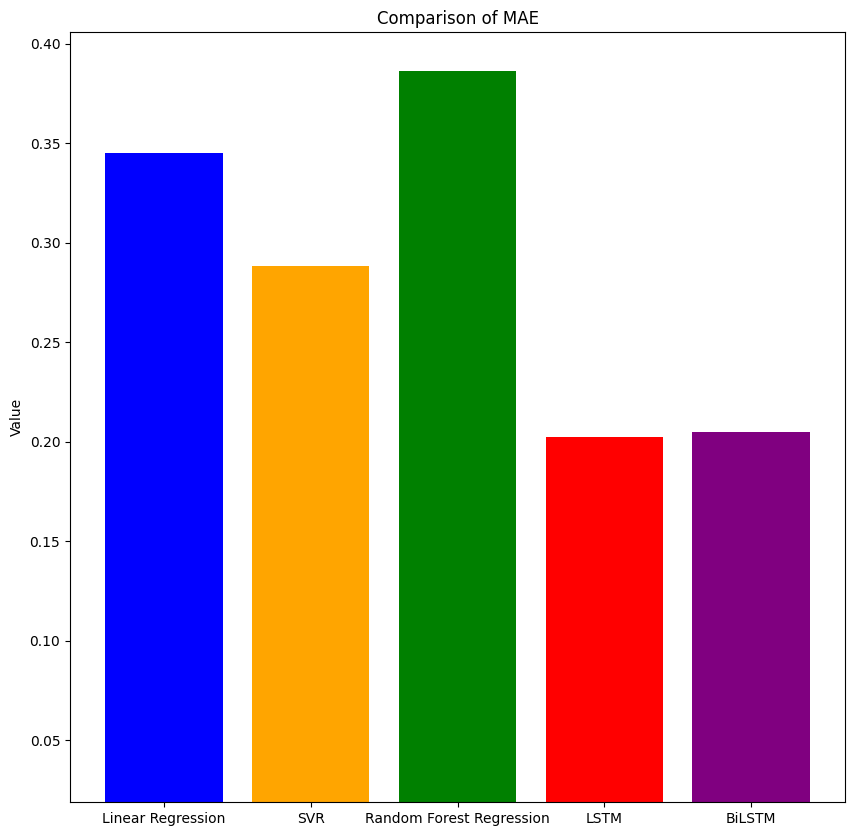

In [39]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE, RMSE, and MAE
models = ['Linear Regression', 'SVR', 'Random Forest Regression', 'LSTM', 'BiLSTM']
mse_values = [mse_linear_regression, mse_SVR, mse_RFR, mse_LSTM, mse_biLSTM]
rmse_values = [rmse_linear_regression, rmse_SVR, rmse_RFR, rmse_LSTM, rmse_biLSTM]
mae_values = [mae_linear_regression, mae_SVR, mae_RFR, mae_LSTM, mae_biLSTM]
# mape_values = [mape_linear_regression, mape_SVR, mape_RFR, mape_LSTM, mape_biLSTM]
# median_ape_values = [median_ape_linear_regression, median_ape_SVR, median_ape_RFR, median_ape_LSTM, median_ape_biLSTM]
# r2_values = [r2_linear_regression, r2_SVR, r2_RFR, r2_LSTM, r2_biLSTM]
# adjusted_r2_values = [adjusted_r2_linear_regression, adjusted_r2_SVR, adjusted_r2_RFR, adjusted_r2_LSTM, adjusted_r2_biLSTM]

# Create a function to plot the bar graphs
def plot_graph(models, values, title):
    plt.figure(figsize=(10, 10))
    plt.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel('Value')
    min_val = min(values)
    max_val = max(values)
    plt.ylim(min_val - 1 * (max_val - min_val))
    plt.show()

# Plot the MSE, RMSE, and MAE bar graphs
plot_graph(models, mse_values, 'Comparison of MSE')
plot_graph(models, rmse_values, 'Comparison of RMSE')
plot_graph(models, mae_values, 'Comparison of MAE')
# plot_graph(models, mape_values, 'Comparison of MAPE')
# plot_graph(models, median_ape_values, 'Comparison of Median APE')
# plot_graph(models, r2_values, 'Comparison of r2 scores')
# plot_graph(models, adjusted_r2_values, 'Comparison of adjusted r2 scores')

# **USING ONLY TECHNICAL DATA**

## Label

In [ ]:
import pandas as pd

# Shift the Stock Return column to get the next year's return as the target variable
yearly_price_data["Next Year's Return"] = yearly_price_data.groupby("Symbol")["Return"].shift(-3)

# Drop rows where Next Year's Stock Return is NaN (since we can't predict those)
yearly_price_data.dropna(subset=["Next Year's Return"], inplace=True)

# Sort the data by the "Year" column in descending order ("Year" is the column indicating time)
yearly_price_data_sorted = yearly_price_data.sort_values(by="Year", ascending=False)

# Dropping "Symbol" column
yearly_price_data_sorted = yearly_price_data_sorted.drop(columns=["Symbol"])

## Train test split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Calculate the index where 20% of the data lies
test_index = int(0.2 * len(yearly_price_data_sorted))

# Split the data into training and testing sets
X_train = yearly_price_data_sorted.iloc[test_index:]  # Use data from the test_index onwards for training
X_test = yearly_price_data_sorted.iloc[:test_index]  # Use data up to the test_index for testing

# Separate the target variable
y_train = X_train["Next Year's Return"]
y_test = X_test["Next Year's Return"]

# Drop the target variable from the feature sets
X_train = X_train.drop(columns=["Next Year's Return"])
X_test = X_test.drop(columns=["Next Year's Return"])

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])
X_test.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Year  Open_Price  Close_Price    Return    Volume
644   2019   -0.059038    -0.125144 -0.522839 -0.172733
631   2019   -0.191694    -0.221400 -0.542169 -0.164315
5524  2019   -0.274705    -0.283093 -0.610720 -0.069544
5976  2019   -0.309790    -0.259826  0.800187 -0.000217
5478  2019   -0.336482    -0.316208 -0.154258  0.010871
...    ...         ...          ...       ...       ...
1505  1999   -0.315856    -0.309547 -0.593032 -0.169185
1040  1999   -0.286534    -0.269094 -0.150749 -0.175999
650   1999   -0.251652    -0.249544 -0.343587 -0.176354
3095  1999    0.128014     0.084264 -0.272406 -0.176509
5424  1999   -0.018594     0.079436  0.297512 -0.176502

[4184 rows x 5 columns]
      Year  Open_Price  Close_Price    Return    Volume
6828  2021   -0.210702    -0.228448 -0.476392 -0.174704
1229  2021   -0.348616    -0.312154  1.648602 -0.099288
6190  2021   -0.051051    -0.187996 -0.875809 -0.170526
5157  2021   -0.275109    -0.222462  0.508421 -0.126093
472   2021   -0.353165 

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.085137  0.058766 -0.020270   
Eps                              -0.085137  1.000000 -0.011470  0.474037   
PE                                0.058766 -0.011470  1.000000  0.070613   
Asst/Shr                         -0.020270  0.474037  0.070613  1.000000   
Profit                            0.076715  0.253059 -0.038112  0.056248   
Divid%                            0.021570  0.048609 -0.007188  0.017790   
Div.Yield                        -0.129238  0.096485 -0.087857  0.020653   
Volume                            0.330656 -0.065187 -0.031161 -0.050318   
Open_Price                       -0.237613  0.358138  0.025423  0.265278   
Close_Price                      -0.260267  0.360241  0.020965  0.235182   
Return                           -0.109300  0.011841  0.044807 -0.018374   
Next Year's Return               -0.012689 -0.054182 -0.008802 -0.025190   
Sector_Bank 

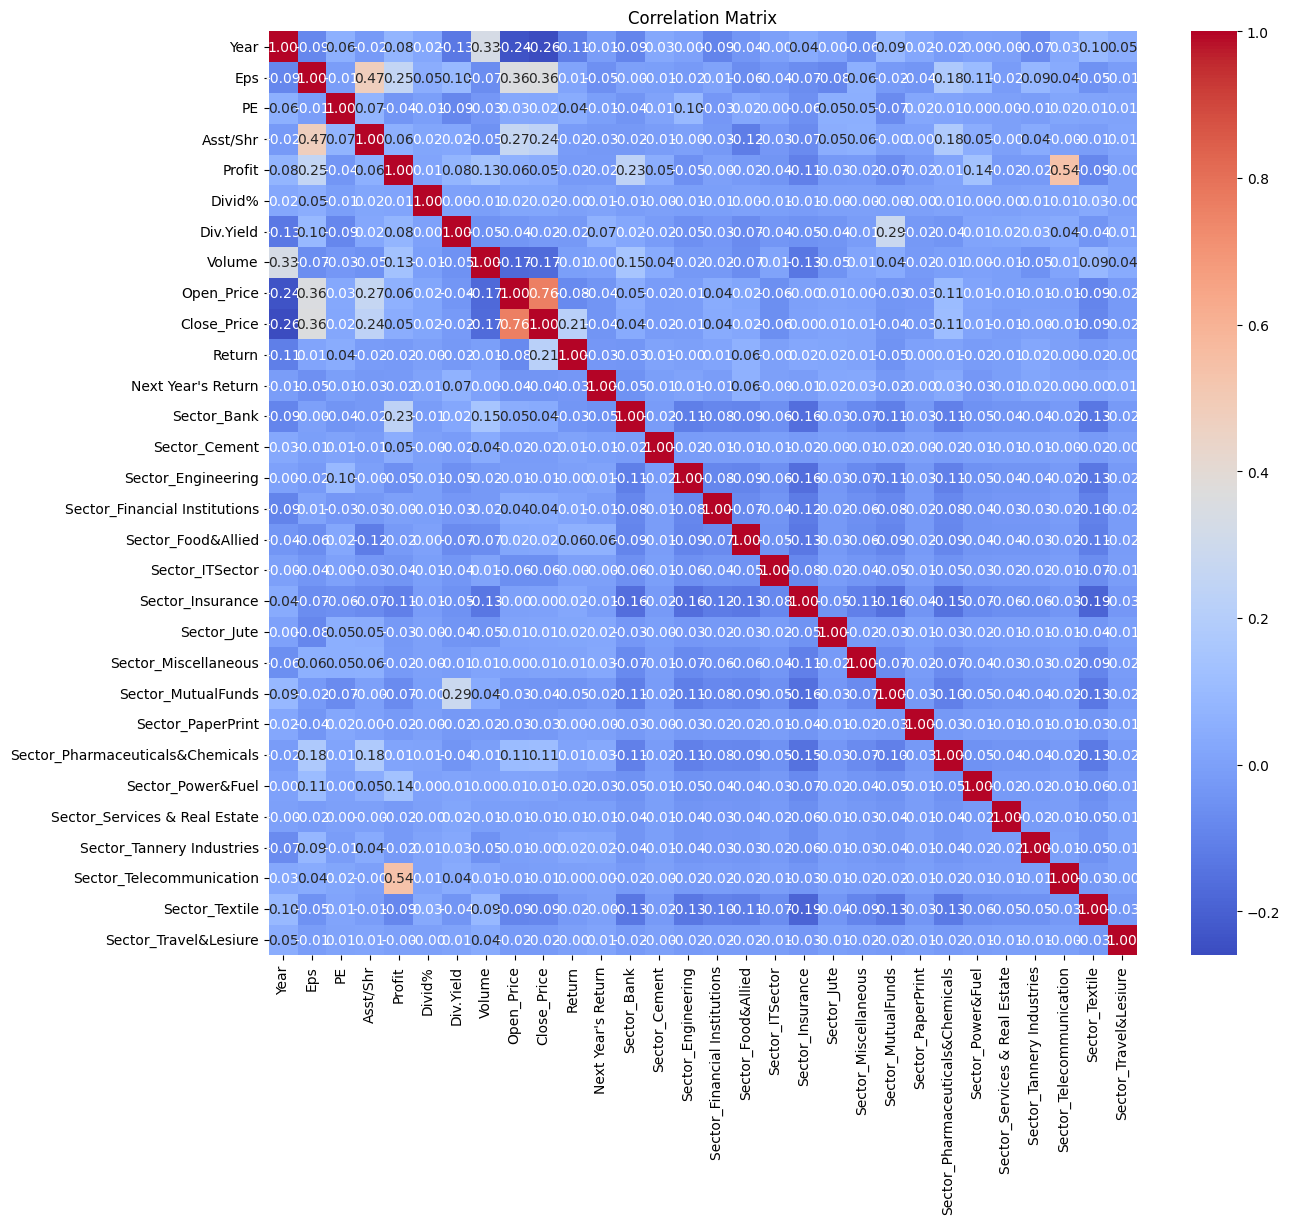

In [ ]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# import pandas as pd

# correlation_matrix = yearly_price_data.corr()
# print(correlation_matrix)

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

## Training Models

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_train, y_pred_train)
print("Train MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Train RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_train, y_pred_train)
print("Train MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_train_linear_regression = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_linear_regression:", median_ape_train_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_train, y_pred_train)
print("Train R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_test, y_pred_test)
print("Test MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Test RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_linear_regression = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_linear_regression:", median_ape_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_test, y_pred_test)
print("Test R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

Train MSE_linear_regression: 0.5471055153592451
Train RMSE_linear_regression: 0.7396658132962785
Train MAE_linear_regression: 0.3918648817235187
Train MAPE_linear_regression: 618742912.0287359
Train Median APE_linear_regression: 112.60531627948158
Train R-squared_linear_regression: 0.0032163330154719727
Train Adjusted R-squared_linear_regression: 0.0020234372914598175

Test MSE_linear_regression: 0.1513130270617048
Test RMSE_linear_regression: 0.3889897518723402
Test MAE_linear_regression: 0.1872999785484333
Test MAPE_linear_regression: 6424684476.606415
Test Median APE_linear_regression: 130.06778460278554
Test R-squared_linear_regression: -0.008559578005449042
Test Adjusted R-squared_linear_regression: -0.013413088967939357


### SVR

In [ ]:
from sklearn.svm import SVR

# Train a SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train.ravel())

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

<ipython-input-46-34dd94df89a9>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


train MSE_SVR: 0.5600264869530556
train RMSE_SVR: 0.7483491744854507
train MAE_SVR: 0.3788913845045262
Train MAPE_SVR: 164580184.5630885
Train Median APE_SVR: 97.34512635420364
Train R-squared_SVR: -0.020324671570863373
Train Adjusted R-squared_SVR: -0.02154573987097219

Test MSE: 0.15078528761992807
Test RMSE_SVR: 0.38831081316379545
Test MAE_SVR: 0.16565021604401386
Test MAPE_SVR: 3102783960.8719573
Test Median APE_SVR: 94.40628271755125
Test R-squared_SVR: -0.005041991456353756
Test Adjusted R-squared_SVR: -0.009878574668367168


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model
model = SVR()

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Regularization parameter
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5], # Margin of tolerance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Instantiate SVR with best hyperparameters
best_model = SVR(**best_params)

# Train the model with best hyperparameters
best_model.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 63 candidates, totalling 315 fits


<ipython-input-47-6390c9df7a4e>:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train, y_train.ravel())


[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.7s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.7s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.7s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.7s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.7s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.1s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.3s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.2s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.3s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.3s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.7s
[CV] END ..................C

<ipython-input-47-6390c9df7a4e>:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_model.fit(X_train, y_train.ravel())


SVR(C=0.001, epsilon=0.5)

In [ ]:
# Make predictions on the training set
y_pred_train = best_model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

train MSE_SVR: 0.5489539557483498
train RMSE_SVR: 0.740914270174593
train MAE_SVR: 0.3943237283211709
Train MAPE_SVR: 628618227.2775947
Train Median APE_SVR: 118.92651291138317
Train R-squared_SVR: -0.00015138150673377204
Train Adjusted R-squared_SVR: -0.0013483075257700872

Test MSE: 0.15722098294129133
Test RMSE_SVR: 0.396511012383378
Test MAE_SVR: 0.21484305189776826
Test MAPE_SVR: 13105391125.486374
Test Median APE_SVR: 169.12544495496178
Test R-squared_SVR: -0.047938378393605596
Test Adjusted R-squared_SVR: -0.05298139272658742


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("train MSE:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("train RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_RFR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_train_RFR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_RFR:", median_ape_train_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_train, y_pred_train)
print("Train R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_RFR:", adjusted_r2_RFR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE_RFR:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_RFR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_RFR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_RFR:", median_ape_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_test, y_pred_test)
print("Test R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

train MSE: 0.06593341985622854
train RMSE_RFR: 0.2567750374476237
train MAE_RFR: 0.12293655162408597
Train MAPE_RFR: 771774624.7817247
Train Median APE_RFR: 29.763645511137494
Train R-squared_RFR: 0.8798744407137489
Train Adjusted R-squared_RFR: 0.8797306810688396

Test MSE_RFR: 0.22777713515859432
Test RMSE_RFR: 0.4772600288716774
Test MAE_RFR: 0.3181581515122173
Test MAPE_RFR: 32317484566.651546
Test Median APE_RFR: 260.97014411044603
Test R-squared_RFR: -0.5182222956993678
Test Adjusted R-squared_RFR: -0.5255284665160156


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a Random Forest Regression model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Train RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("Train MAE:", mae_RFR)

print()

# Make predictions on the testing set
y_pred_test = best_rf_model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_RFR)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Train MSE: 0.19160085071084199
Train RMSE: 0.4377223443129697
Train MAE: 0.23567866869938753

Test MSE: 0.17625171822470465
Test RMSE: 0.4198234369645228
Test MAE: 0.24854487621478788


### LSTM

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4184, 5)
(1045, 5)
(4184,)
(1045,)


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define time steps and calculate features per timestep
timesteps = 1
features_per_timestep = X_train.shape[1] // timesteps

# Convert DataFrames to NumPy arrays and reshape
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, features_per_timestep)

# Convert features to float32
X_train_reshaped = X_train_reshaped.astype(np.float32)
X_test_reshaped = X_test_reshaped.astype(np.float32)

# Convert labels to binary and float32 for compatibility with TensorFlow
y_train = (y_train > 0.5).astype(np.float32)  # Ensure binary values 0.0 or 1.0
y_test = (y_test > 0.5).astype(np.float32)

# Initialize the RNN model
model = Sequential()

# Add input and LSTM layers
model.add(Input(shape=(timesteps, features_per_timestep)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Evaluate and make predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))

# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
print("Train MAPE:", mape_train)
print("Train Median APE:", median_ape_train)
print("Train R-squared:", r2_train)
print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluation metrics for test set
mse_LSTM = mean_squared_error(y_test, y_pred_test)
rmse_LSTM = sqrt(mse_LSTM)
mae_LSTM = mean_absolute_error(y_test, y_pred_test)
mape_LSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
median_ape_LSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
r2_LSTM = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_LSTM = 1 - (1 - r2_LSTM) * ((n_test - 1) / (n_test - p_test - 1))

# Print test metrics
print("Test MSE:", mse_LSTM)
print("Test RMSE:", rmse_LSTM)
print("Test MAE:", mae_LSTM)
print("Test MAPE:", mape_LSTM)
print("Test Median APE:", median_ape_LSTM)
print("Test R-squared:", r2_LSTM)
print("Test Adjusted R-squared:", adjusted_r2_LSTM)

Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8688 - loss: 0.5451
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.4048
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8776 - loss: 0.3733
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8548 - loss: 0.4148
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8623 - loss: 0.4021
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8660 - loss: 0.3947
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8579 - loss: 0.4091
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8696 - loss: 0.3881
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8532 - loss: 0.4187
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.3907
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8590 - loss: 0.4075
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### BiLSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt

# Ensure data is in correct numeric format
X_train_reshaped = np.array(X_train, dtype=np.float32).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test, dtype=np.float32).reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Initialize the BiLSTM model
model = Sequential()

# Adding the input layer and the BiLSTM layers
model.add(Input(shape=(1, X_train.shape[1])))  # Explicit input definition
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))  # Output layer

# Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the Training set
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Making predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluate testing performance
mse_biLSTM = mean_squared_error(y_test, y_pred_test)
print('Test MSE_biLSTM:', mse_biLSTM)

rmse_biLSTM = sqrt(mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)

mae_biLSTM = mean_absolute_error(y_test, y_pred_test)
print('Test MAE_biLSTM:', mae_biLSTM)

epsilon = 1e-10  # Small constant to avoid division by zero
mape_biLSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print('Test MAPE_biLSTM:', mape_biLSTM)

median_ape_biLSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_biLSTM:", median_ape_biLSTM)

r2_biLSTM = r2_score(y_test, y_pred_test)
print('Test R2_biLSTM:', r2_biLSTM)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_biLSTM = 1 - (1 - r2_biLSTM) * (n - 1) / (n - p - 1)
print('Test Adjusted R2_biLSTM:', adjusted_r2_biLSTM)


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.1189
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1159
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1234
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1210
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1131
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1162
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1195
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1216
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1067
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1139
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1165
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1189
Epoch 13/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1207
Epoch 14/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1251
Epoch 15/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 

## Model Comparison

In [ ]:
print("Linear Regression")
print('Test MSE_linear_regression:', mse_linear_regression)
print('Test RMSE_linear_regression:', rmse_linear_regression)
print('Test MAE_linear_regression:', mae_linear_regression)
print('Test MAPE_linear_regression:', mape_linear_regression)
print("Test Median APE_linear_regression:", median_ape_linear_regression)
print("Test R-squared_linear_regression:", r2_linear_regression)
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print("\nSVR")
print('Test MSE_SVR:', mse_SVR)
print('Test RMSE_SVR:', rmse_SVR)
print('Test MAE_SVR:', mae_SVR)
print('Test MAPE_SVR:', mape_SVR)
print("Test Median APE_SVR:", median_ape_SVR)
print("Test R-squared_SVR:", r2_SVR)
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

print("\nRandom Forest Regression")
print('Test MSE_RFR:', mse_RFR)
print('Test RMSE_RFR:', rmse_RFR)
print('Test MAE_RFR:', mae_RFR)
print('Test MAPE_RFR:', mape_RFR)
print("Test Median APE_RFR:", median_ape_RFR)
print("Test R-squared_RFR:", r2_RFR)
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

print("\nLSTM")
print('Test MSE_LSTM:', mse_LSTM)
print('Test RMSE_LSTM:', rmse_LSTM)
print('Test MAE_LSTM:', mae_LSTM)
print('Test MAPE_LSTM:', mape_LSTM)
print("Test Median APE_LSTM:", median_ape_LSTM)
print("Test R-squared_LSTM:", r2_LSTM)
print("Test Adjusted R-squared_LSTM:", adjusted_r2_LSTM)

print("\nBiLSTM")
print('Test MSE_biLSTM:', mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)
print('Test MAE_biLSTM:', mae_biLSTM)
print('Test MAPE_biLSTM:', mape_biLSTM)
print('Test median_ape_biLSTM:', median_ape_biLSTM)
print('Test r2_biLSTM:', r2_biLSTM)
print('Test adjusted_r2_biLSTM:', adjusted_r2_biLSTM)

Linear Regression
Test MSE_linear_regression: 0.1513130270617048
Test RMSE_linear_regression: 0.3889897518723402
Test MAE_linear_regression: 0.1872999785484333
Test MAPE_linear_regression: 6424684476.606415
Test Median APE_linear_regression: 130.06778460278554
Test R-squared_linear_regression: -0.008559578005449042
Test Adjusted R-squared_linear_regression: -0.013413088967939357

SVR
Test MSE_SVR: 0.15722098294129133
Test RMSE_SVR: 0.396511012383378
Test MAE_SVR: 0.21484305189776826
Test MAPE_SVR: 13105391125.486374
Test Median APE_SVR: 169.12544495496178
Test R-squared_SVR: -0.047938378393605596
Test Adjusted R-squared_SVR: -0.05298139272658742

Random Forest Regression
Test MSE_RFR: 0.17625171822470465
Test RMSE_RFR: 0.4198234369645228
Test MAE_RFR: 0.24854487621478788
Test MAPE_RFR: 32317484566.651546
Test Median APE_RFR: 260.97014411044603
Test R-squared_RFR: -0.5182222956993678
Test Adjusted R-squared_RFR: -0.5255284665160156

LSTM
Test MSE_LSTM: 0.04090591
Test RMSE_LSTM: 0.20225

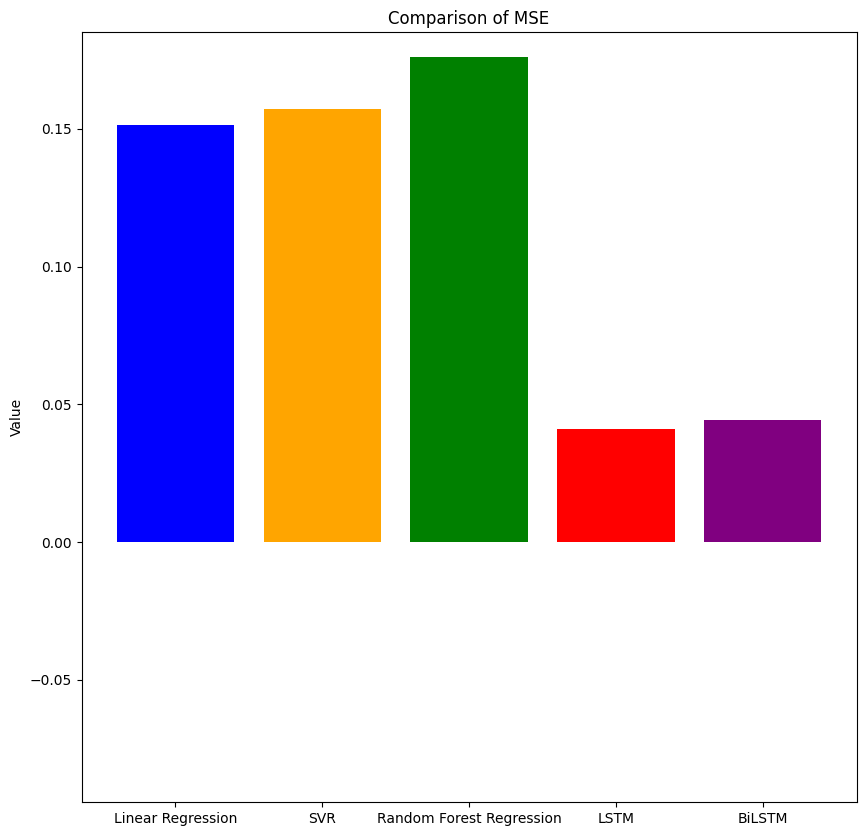

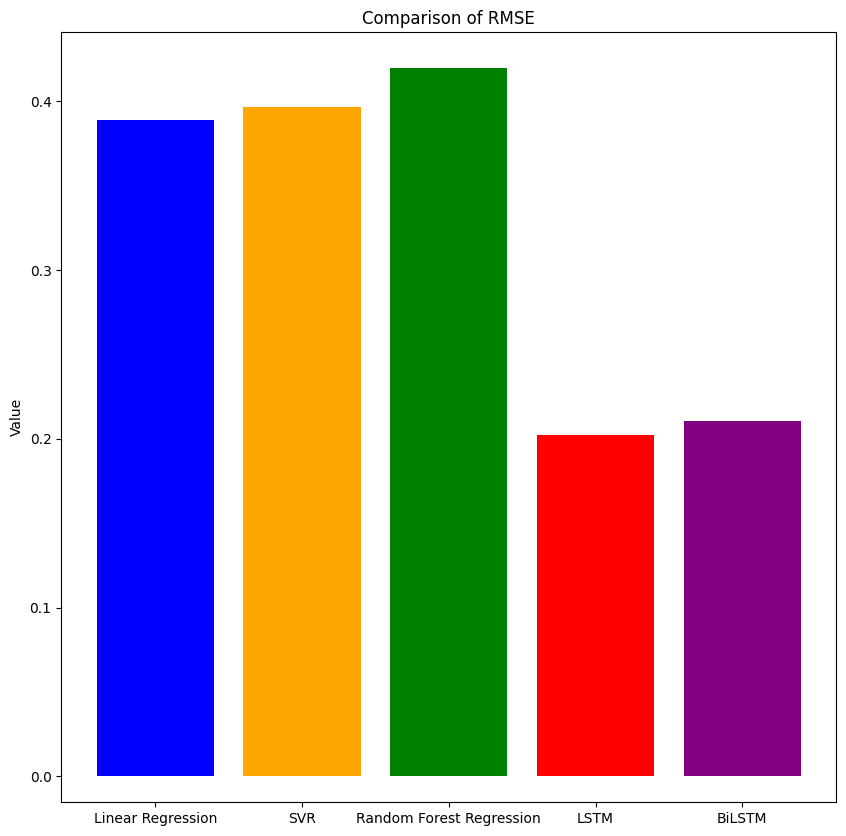

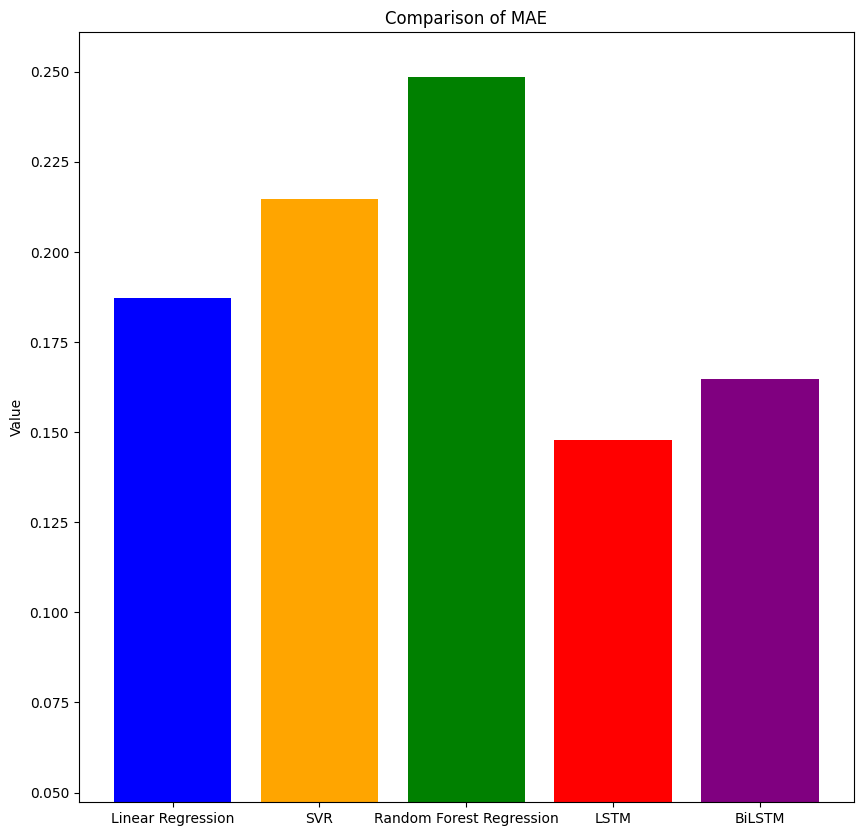

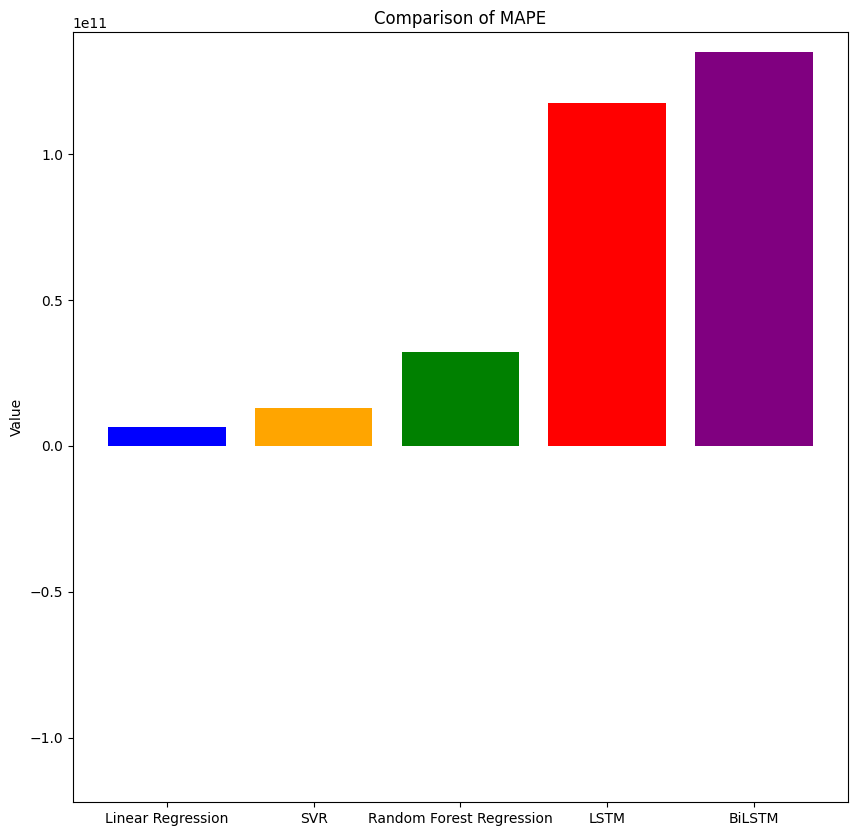

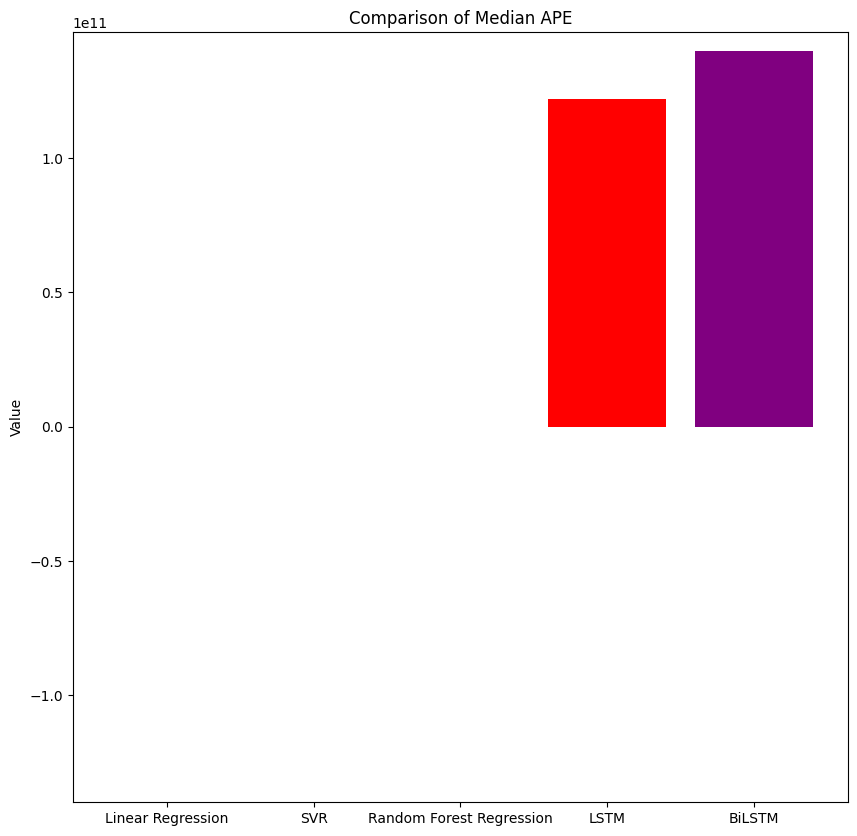

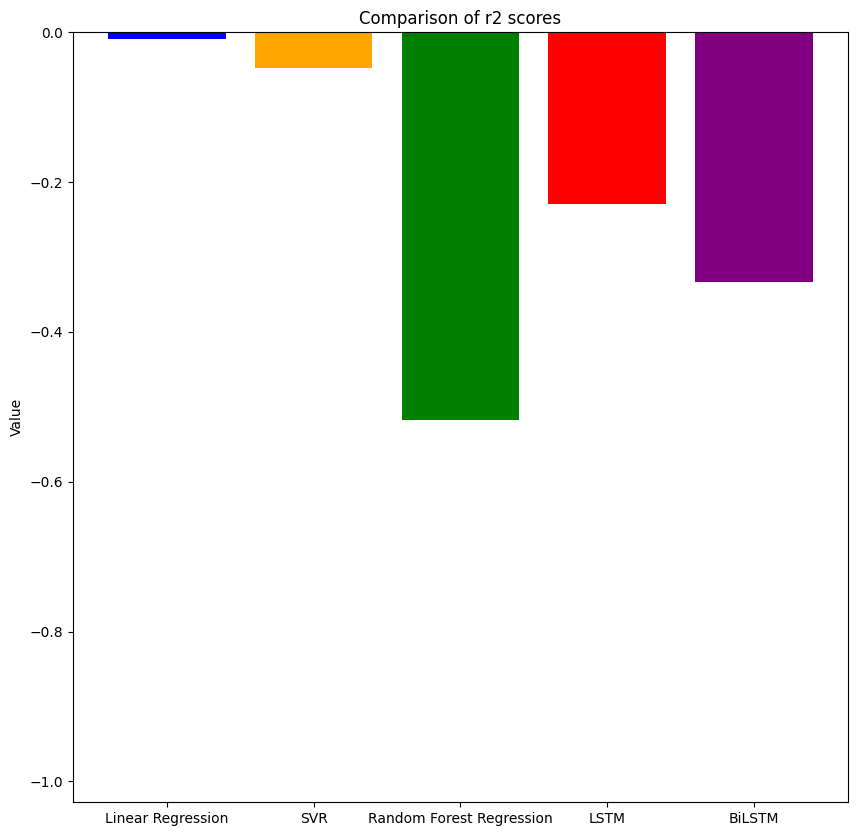

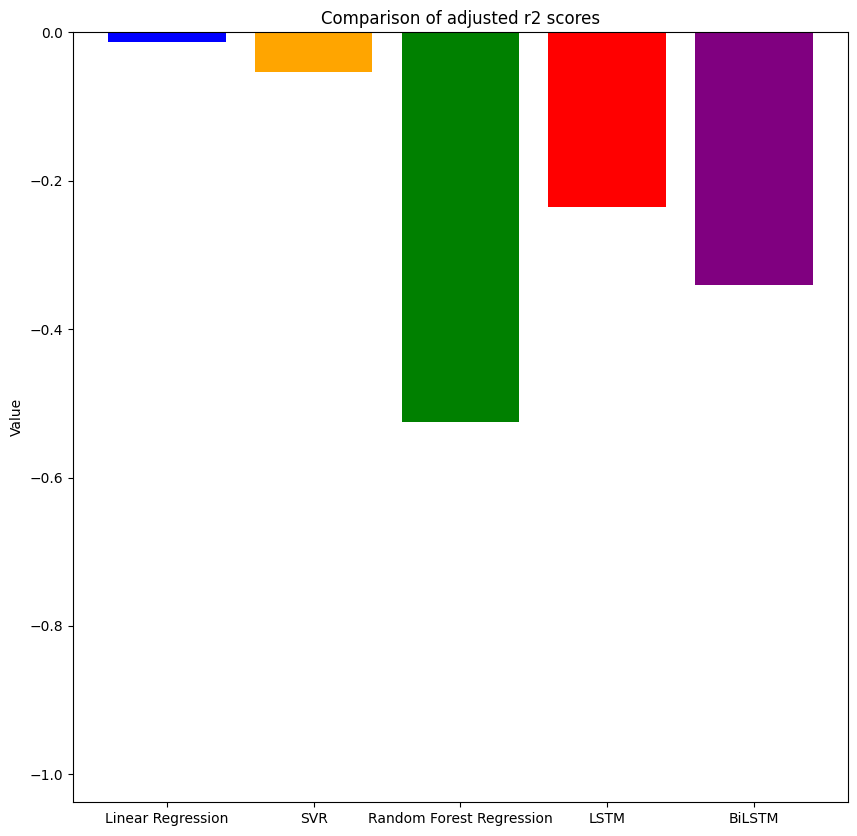

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE, RMSE, and MAE
models = ['Linear Regression', 'SVR', 'Random Forest Regression', 'LSTM', 'BiLSTM']
mse_values = [mse_linear_regression, mse_SVR, mse_RFR, mse_LSTM, mse_biLSTM]
rmse_values = [rmse_linear_regression, rmse_SVR, rmse_RFR, rmse_LSTM, rmse_biLSTM]
mae_values = [mae_linear_regression, mae_SVR, mae_RFR, mae_LSTM, mae_biLSTM]
mape_values = [mape_linear_regression, mape_SVR, mape_RFR, mape_LSTM, mape_biLSTM]
median_ape_values = [median_ape_linear_regression, median_ape_SVR, median_ape_RFR, median_ape_LSTM, median_ape_biLSTM]
r2_values = [r2_linear_regression, r2_SVR, r2_RFR, r2_LSTM, r2_biLSTM]
adjusted_r2_values = [adjusted_r2_linear_regression, adjusted_r2_SVR, adjusted_r2_RFR, adjusted_r2_LSTM, adjusted_r2_biLSTM]

# Create a function to plot the bar graphs
def plot_graph(models, values, title):
    plt.figure(figsize=(10, 10))
    plt.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel('Value')
    min_val = min(values)
    max_val = max(values)
    plt.ylim(min_val - 1 * (max_val - min_val))
    plt.show()

# Plot the MSE, RMSE, and MAE bar graphs
plot_graph(models, mse_values, 'Comparison of MSE')
plot_graph(models, rmse_values, 'Comparison of RMSE')
plot_graph(models, mae_values, 'Comparison of MAE')
plot_graph(models, mape_values, 'Comparison of MAPE')
plot_graph(models, median_ape_values, 'Comparison of Median APE')
plot_graph(models, r2_values, 'Comparison of r2 scores')
plot_graph(models, adjusted_r2_values, 'Comparison of adjusted r2 scores')

# **USING ONLY FUNDAMENTAL DATA**

## Dropping Columns

In [ ]:
import pandas as pd
final_fundamental_data = final_data
# Dropping price column
final_fundamental_data = final_fundamental_data.drop(columns=["Volume","Return","Close_Price","Open_Price"])

## Train test split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sort the data by the "Year" column in descending order ("Year" is the column indicating time)
final_fundamental_data_sorted = final_fundamental_data.sort_values(by="Year", ascending=False)

# Calculate the index where 20% of the data lies
test_index = int(0.2 * len(final_fundamental_data_sorted))

# Split the data into training and testing sets
X_train = final_fundamental_data_sorted.iloc[test_index:]  # Use data from the test_index onwards for training
X_test = final_fundamental_data_sorted.iloc[:test_index]  # Use data up to the test_index for testing

# Separate the target variable
y_train = X_train["Next Year's Return"]
y_test = X_test["Next Year's Return"]

# Drop the target variable from the feature sets
X_train = X_train.drop(columns=["Next Year's Return"])
X_test = X_test.drop(columns=["Next Year's Return"])

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.iloc[:, 1:7] = scaler.fit_transform(X_train.iloc[:, 1:7])
X_test.iloc[:, 1:7] = scaler.transform(X_test.iloc[:, 1:7])

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Year        Eps        PE  Asst/Shr    Profit    Divid%  Div.Yield  \
935   2018  -0.292478 -0.033438 -0.079813 -0.203384 -0.323916  -0.682654   
387   2018  -1.099847 -0.331182 -0.184395 -0.618391 -0.323916  -0.682654   
798   2018  14.602101 -0.291706  4.470336  7.078415  7.580333   1.998069   
5     2018  -0.308643 -0.248215 -0.250974 -0.119581 -0.292299   0.169584   
550   2018  -0.122741  0.472792  0.175799 -0.272042 -0.007746  -0.381864   
...    ...        ...       ...       ...       ...       ...        ...   
4929  2000   0.301150 -0.266280  0.108140 -0.270356 -0.086788   0.385941   
1164  2000   0.424186 -0.258653  0.472753 -0.290014 -0.323916   0.399134   
4063  2000   0.341564 -0.226403  0.337238 -0.262371  0.150339   0.567998   
2357  2000   0.122433  0.370154 -0.077653 -0.174174 -0.007746  -0.503235   
3037  2000  -0.234103 -0.225466 -0.254607 -0.269112 -0.165831   1.317334   

      Sector_Bank  Sector_Cement  Sector_Engineering  ...  \
935         False         

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.085137  0.058766 -0.020270   
Eps                              -0.085137  1.000000 -0.011470  0.474037   
PE                                0.058766 -0.011470  1.000000  0.070613   
Asst/Shr                         -0.020270  0.474037  0.070613  1.000000   
Profit                            0.076715  0.253059 -0.038112  0.056248   
Divid%                            0.021570  0.048609 -0.007188  0.017790   
Div.Yield                        -0.129238  0.096485 -0.087857  0.020653   
Volume                            0.330656 -0.065187 -0.031161 -0.050318   
Open_Price                       -0.237613  0.358138  0.025423  0.265278   
Close_Price                      -0.260267  0.360241  0.020965  0.235182   
Return                           -0.109300  0.011841  0.044807 -0.018374   
Next Year's Return               -0.012689 -0.054182 -0.008802 -0.025190   
Sector_Bank 

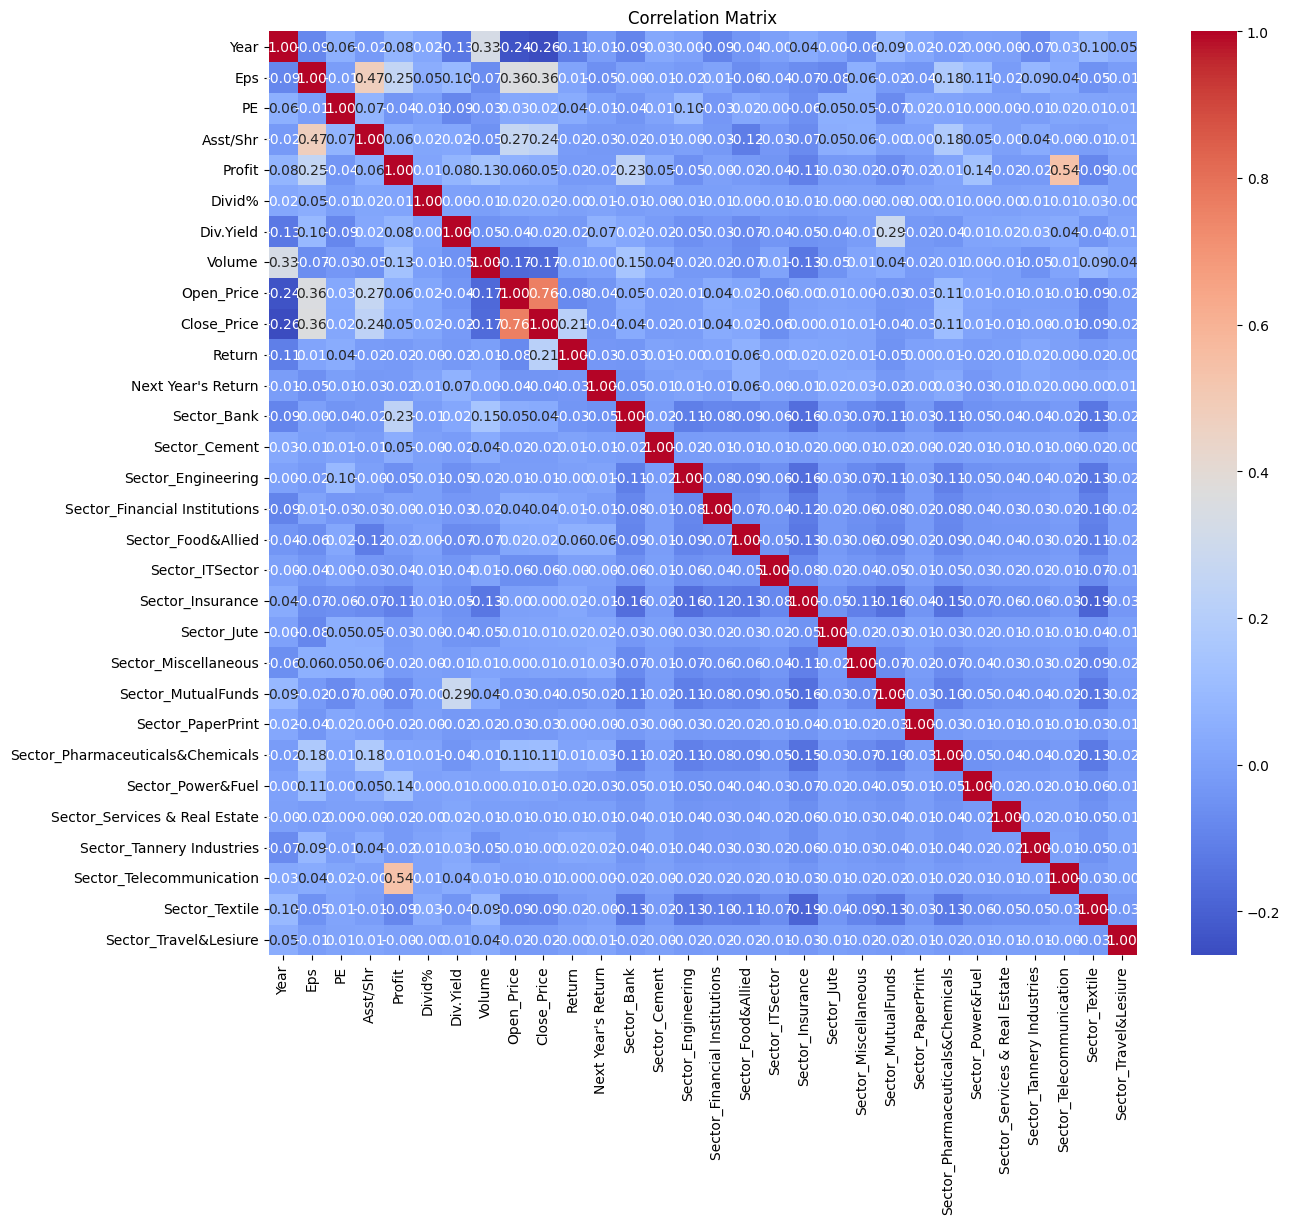

In [ ]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# import pandas as pd

# correlation_matrix = yearly_price_data.corr()
# print(correlation_matrix)

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

## Training Models

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_train, y_pred_train)
print("Train MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Train RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_train, y_pred_train)
print("Train MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_train_linear_regression = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_linear_regression:", median_ape_train_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_train, y_pred_train)
print("Train R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_test, y_pred_test)
print("Test MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Test RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_linear_regression = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_linear_regression:", median_ape_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_test, y_pred_test)
print("Test R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

Train MSE_linear_regression: 0.3890310286040591
Train RMSE_linear_regression: 0.6237235193609898
Train MAE_linear_regression: 0.38406160480643214
Train MAPE_linear_regression: 684923856.7633843
Train Median APE_linear_regression: 100.60060347578145
Train R-squared_linear_regression: 0.028395509682544784
Train Adjusted R-squared_linear_regression: 0.020640045998656986

Test MSE_linear_regression: 2.4587635984676783
Test RMSE_linear_regression: 1.5680445141856396
Test MAE_linear_regression: 0.34202417320296413
Test MAPE_linear_regression: 5710967653.287248
Test Median APE_linear_regression: 107.81451019486543
Test R-squared_linear_regression: -7.243803853243099
Test Adjusted R-squared_linear_regression: -7.5139153818552575


### SVR

In [ ]:
from sklearn.svm import SVR

# Train a SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train.ravel())

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

<ipython-input-62-34dd94df89a9>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


train MSE_SVR: 0.41028717180691365
train RMSE_SVR: 0.6405366279978949
train MAE_SVR: 0.37792622657230207
Train MAPE_SVR: 326938735.6236333
Train Median APE_SVR: 94.92586055430421
Train R-squared_SVR: -0.02469168044938619
Train Adjusted R-squared_SVR: -0.032870892458081835

Test MSE: 0.333505967983477
Test RMSE_SVR: 0.5774997558297986
Test MAE_SVR: 0.286344423847499
Test MAPE_SVR: 5076470955.423204
Test Median APE_SVR: 109.53045962222103
Test R-squared_SVR: -0.11818711878408283
Test Adjusted R-squared_SVR: -0.1548249667127879


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model
model = SVR()

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Regularization parameter
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5], # Margin of tolerance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Instantiate SVR with best hyperparameters
best_model = SVR(**best_params)

# Train the model with best hyperparameters
best_model.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 63 candidates, totalling 315 fits


<ipython-input-63-6390c9df7a4e>:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train, y_train.ravel())


[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.9s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.9s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.8s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.5s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.5s
[CV] END ..................C

<ipython-input-63-6390c9df7a4e>:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_model.fit(X_train, y_train.ravel())


SVR(C=0.001, epsilon=0.5)

In [ ]:
# Make predictions on the training set
y_pred_train = best_model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

train MSE_SVR: 0.4009940367969328
train RMSE_SVR: 0.6332408994979184
train MAE_SVR: 0.3950892003113957
Train MAPE_SVR: 538164522.1255096
Train Median APE_SVR: 116.28123550403484
Train R-squared_SVR: -0.0014820877924124343
Train Adjusted R-squared_SVR: -0.009476038046183355

Test MSE: 0.3022453849395556
Test RMSE_SVR: 0.5497684830358645
Test MAE_SVR: 0.28847645631477853
Test MAPE_SVR: 8224393144.350435
Test Median APE_SVR: 130.90024717326426
Test R-squared_SVR: -0.013375857094382715
Test Adjusted R-squared_SVR: -0.046579522136793505


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("train MSE:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("train RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_RFR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_train_RFR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_RFR:", median_ape_train_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_train, y_pred_train)
print("Train R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_RFR:", adjusted_r2_RFR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE_RFR:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_RFR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_RFR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_RFR:", median_ape_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_test, y_pred_test)
print("Test R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

train MSE: 0.053471059857324116
train RMSE_RFR: 0.23123810208813797
train MAE_RFR: 0.12737290941286517
Train MAPE_RFR: 487662824.27819604
Train Median APE_RFR: 30.042924813378534
Train R-squared_RFR: 0.8664560972274398
Train Adjusted R-squared_RFR: 0.8653901337634187

Test MSE_RFR: 0.39040785846496323
Test RMSE_RFR: 0.62482626262423
Test MAE_RFR: 0.40954164097543744
Test MAPE_RFR: 30035044889.943676
Test Median APE_RFR: 205.66623198901962
Test R-squared_RFR: -0.3089691949057698
Test Adjusted R-squared_RFR: -0.35185809382142397


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a Random Forest Regression model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Train RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("Train MAE:", mae_RFR)

print()

# Make predictions on the testing set
y_pred_test = best_rf_model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_RFR)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Train MSE: 0.14689048904964241
Train RMSE: 0.3832629502699712
Train MAE: 0.23211919646292192

Test MSE: 0.3520113127376575
Test RMSE: 0.5933054126987698
Test MAE: 0.3821393544150899


### LSTM

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3158, 25)
(789, 25)
(3158,)
(789,)


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define time steps and calculate features per timestep
timesteps = 1
features_per_timestep = X_train.shape[1] // timesteps

# Convert DataFrames to NumPy arrays and reshape
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, features_per_timestep)

# Convert features to float32
X_train_reshaped = X_train_reshaped.astype(np.float32)
X_test_reshaped = X_test_reshaped.astype(np.float32)

# Convert labels to binary and float32 for compatibility with TensorFlow
y_train = (y_train > 0.5).astype(np.float32)  # Ensure binary values 0.0 or 1.0
y_test = (y_test > 0.5).astype(np.float32)

# Initialize the RNN model
model = Sequential()

# Add input and LSTM layers
model.add(Input(shape=(timesteps, features_per_timestep)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Evaluate and make predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))

# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
print("Train MAPE:", mape_train)
print("Train Median APE:", median_ape_train)
print("Train R-squared:", r2_train)
print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluation metrics for test set
mse_LSTM = mean_squared_error(y_test, y_pred_test)
rmse_LSTM = sqrt(mse_LSTM)
mae_LSTM = mean_absolute_error(y_test, y_pred_test)
mape_LSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
median_ape_LSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
r2_LSTM = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_LSTM = 1 - (1 - r2_LSTM) * ((n_test - 1) / (n_test - p_test - 1))

# Print test metrics
print("Test MSE:", mse_LSTM)
print("Test RMSE:", rmse_LSTM)
print("Test MAE:", mae_LSTM)
print("Test MAPE:", mape_LSTM)
print("Test Median APE:", median_ape_LSTM)
print("Test R-squared:", r2_LSTM)
print("Test Adjusted R-squared:", adjusted_r2_LSTM)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8715 - loss: 0.5626
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 0.4171
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8643 - loss: 0.3978
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4047
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8583 - loss: 0.4090
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8615 - loss: 0.4050
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8614 - loss: 0.4037
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8684 - loss: 0.3903
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8741 - loss: 0.3802
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8715 - loss: 0.3897
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8692 - loss: 0.3887
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - lo

### BiLSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt

# Ensure data is in correct numeric format
X_train_reshaped = np.array(X_train, dtype=np.float32).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test, dtype=np.float32).reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Initialize the BiLSTM model
model = Sequential()

# Adding the input layer and the BiLSTM layers
model.add(Input(shape=(1, X_train.shape[1])))  # Explicit input definition
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))  # Output layer

# Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the Training set
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Making predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluate testing performance
mse_biLSTM = mean_squared_error(y_test, y_pred_test)
print('Test MSE_biLSTM:', mse_biLSTM)

rmse_biLSTM = sqrt(mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)

mae_biLSTM = mean_absolute_error(y_test, y_pred_test)
print('Test MAE_biLSTM:', mae_biLSTM)

epsilon = 1e-10  # Small constant to avoid division by zero
mape_biLSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print('Test MAPE_biLSTM:', mape_biLSTM)

median_ape_biLSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_biLSTM:", median_ape_biLSTM)

r2_biLSTM = r2_score(y_test, y_pred_test)
print('Test R2_biLSTM:', r2_biLSTM)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_biLSTM = 1 - (1 - r2_biLSTM) * (n - 1) / (n - p - 1)
print('Test Adjusted R2_biLSTM:', adjusted_r2_biLSTM)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1200
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1155
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1086
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1229
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1191
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1248
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1202
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1185
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1153
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1161
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1155
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1256
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1192
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1179
Epoch 15/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1148
Epoch 16/20
99/99 

## Model Comparison

In [ ]:
print("Linear Regression")
print('Test MSE_linear_regression:', mse_linear_regression)
print('Test RMSE_linear_regression:', rmse_linear_regression)
print('Test MAE_linear_regression:', mae_linear_regression)
print('Test MAPE_linear_regression:', mape_linear_regression)
print("Test Median APE_linear_regression:", median_ape_linear_regression)
print("Test R-squared_linear_regression:", r2_linear_regression)
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print("\nSVR")
print('Test MSE_SVR:', mse_SVR)
print('Test RMSE_SVR:', rmse_SVR)
print('Test MAE_SVR:', mae_SVR)
print('Test MAPE_SVR:', mape_SVR)
print("Test Median APE_SVR:", median_ape_SVR)
print("Test R-squared_SVR:", r2_SVR)
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

print("\nRandom Forest Regression")
print('Test MSE_RFR:', mse_RFR)
print('Test RMSE_RFR:', rmse_RFR)
print('Test MAE_RFR:', mae_RFR)
print('Test MAPE_RFR:', mape_RFR)
print("Test Median APE_RFR:", median_ape_RFR)
print("Test R-squared_RFR:", r2_RFR)
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

print("\nLSTM")
print('Test MSE_LSTM:', mse_LSTM)
print('Test RMSE_LSTM:', rmse_LSTM)
print('Test MAE_LSTM:', mae_LSTM)
print('Test MAPE_LSTM:', mape_LSTM)
print("Test Median APE_LSTM:", median_ape_LSTM)
print("Test R-squared_LSTM:", r2_LSTM)
print("Test Adjusted R-squared_LSTM:", adjusted_r2_LSTM)

print("\nBiLSTM")
print('Test MSE_biLSTM:', mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)
print('Test MAE_biLSTM:', mae_biLSTM)
print('Test MAPE_biLSTM:', mape_biLSTM)
print('Test median_ape_biLSTM:', median_ape_biLSTM)
print('Test r2_biLSTM:', r2_biLSTM)
print('Test adjusted_r2_biLSTM:', adjusted_r2_biLSTM)

Linear Regression
Test MSE_linear_regression: 2.4587635984676783
Test RMSE_linear_regression: 1.5680445141856396
Test MAE_linear_regression: 0.34202417320296413
Test MAPE_linear_regression: 5710967653.287248
Test Median APE_linear_regression: 107.81451019486543
Test R-squared_linear_regression: -7.243803853243099
Test Adjusted R-squared_linear_regression: -7.5139153818552575

SVR
Test MSE_SVR: 0.3022453849395556
Test RMSE_SVR: 0.5497684830358645
Test MAE_SVR: 0.28847645631477853
Test MAPE_SVR: 8224393144.350435
Test Median APE_SVR: 130.90024717326426
Test R-squared_SVR: -0.013375857094382715
Test Adjusted R-squared_SVR: -0.046579522136793505

Random Forest Regression
Test MSE_RFR: 0.3520113127376575
Test RMSE_RFR: 0.5933054126987698
Test MAE_RFR: 0.3821393544150899
Test MAPE_RFR: 30035044889.943676
Test Median APE_RFR: 205.66623198901962
Test R-squared_RFR: -0.3089691949057698
Test Adjusted R-squared_RFR: -0.35185809382142397

LSTM
Test MSE_LSTM: 0.10506989
Test RMSE_LSTM: 0.3241448605

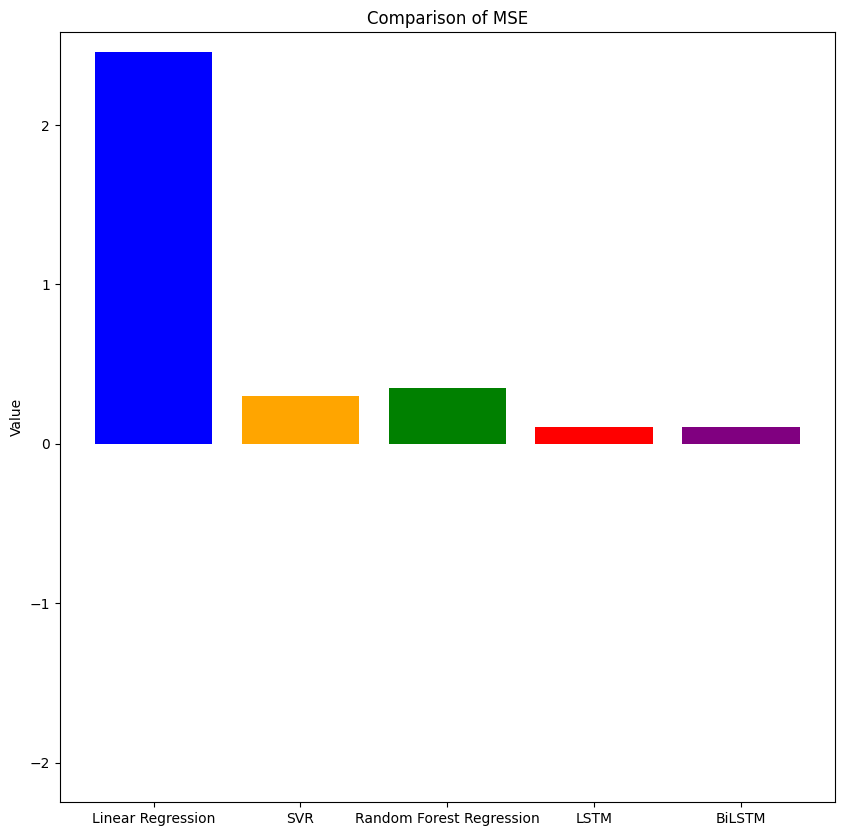

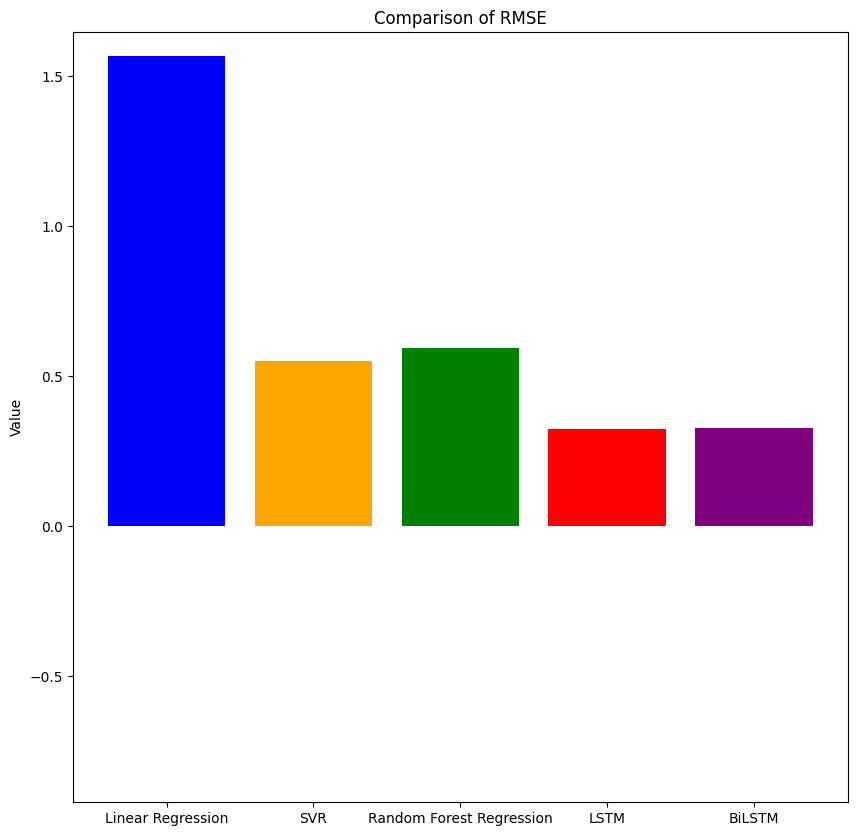

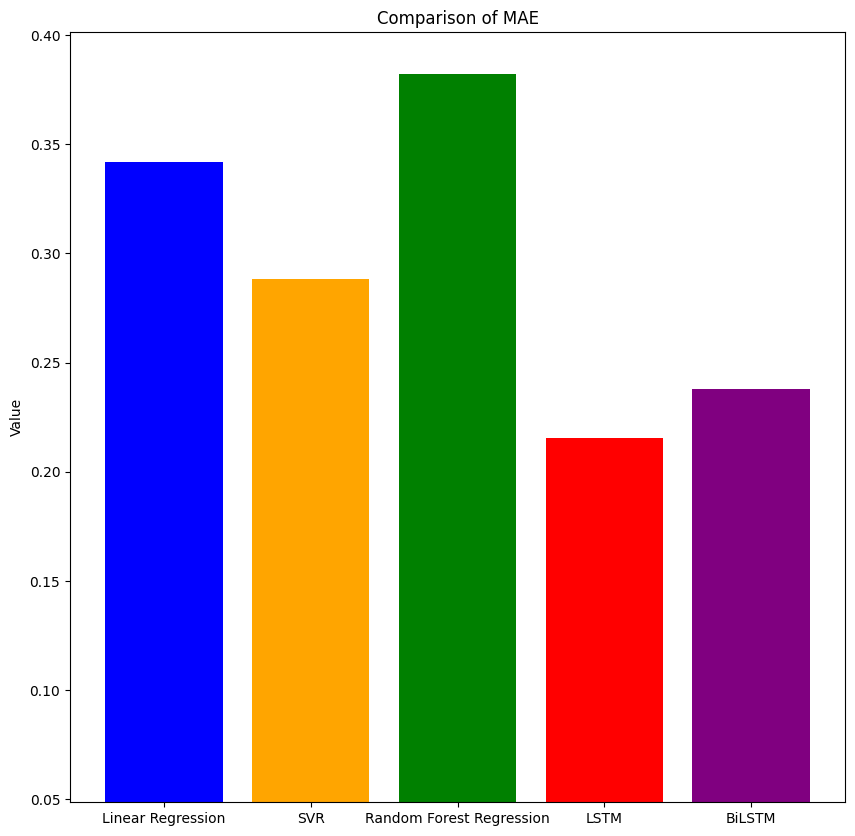

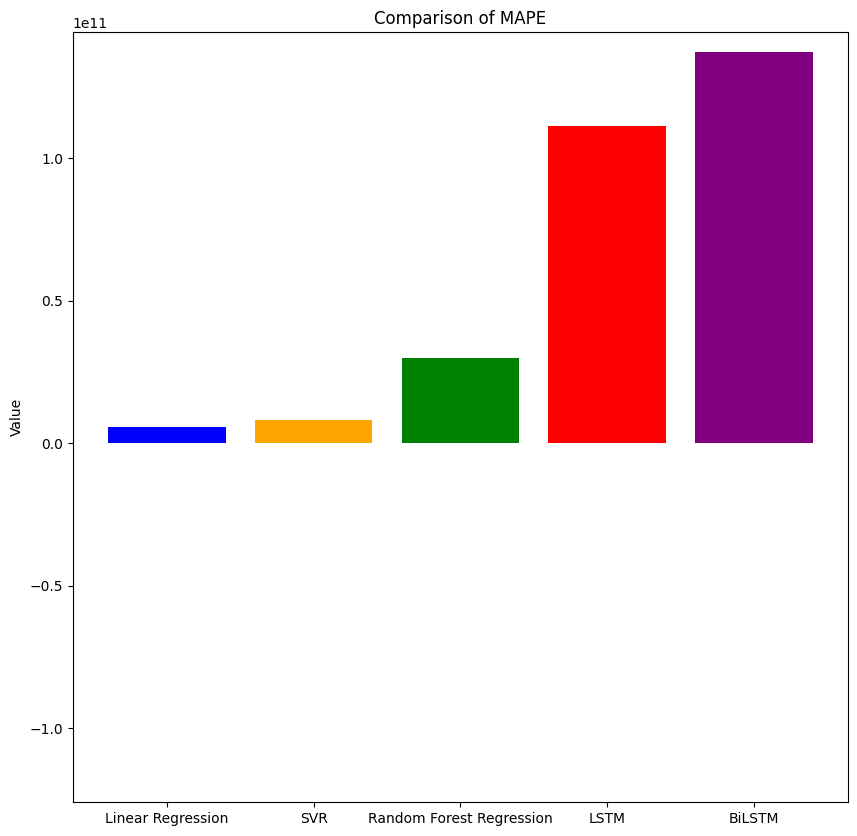

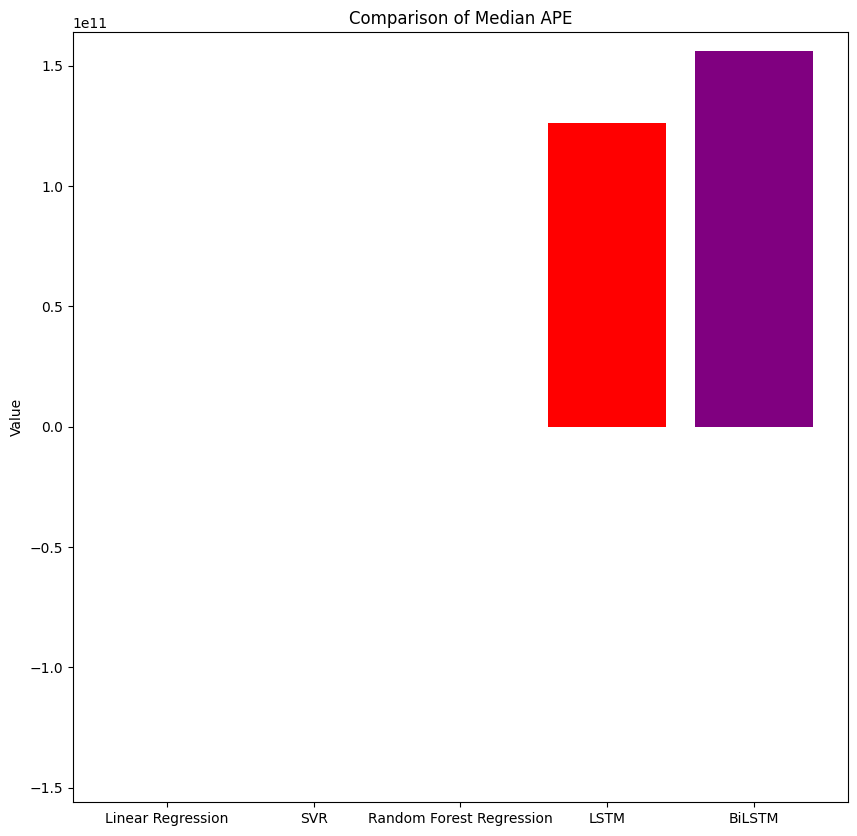

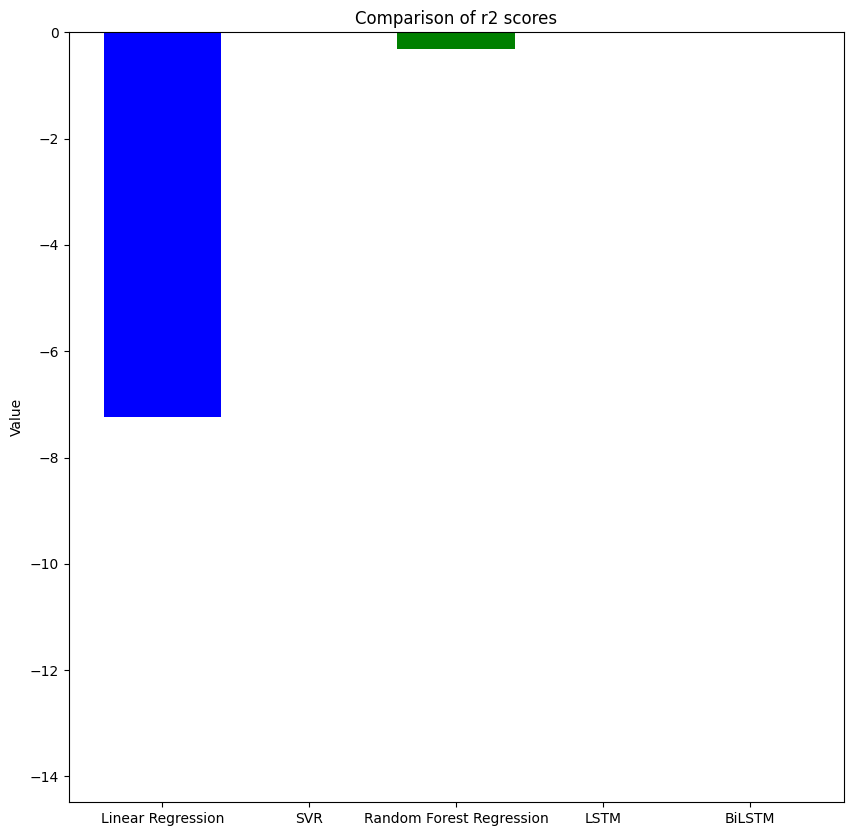

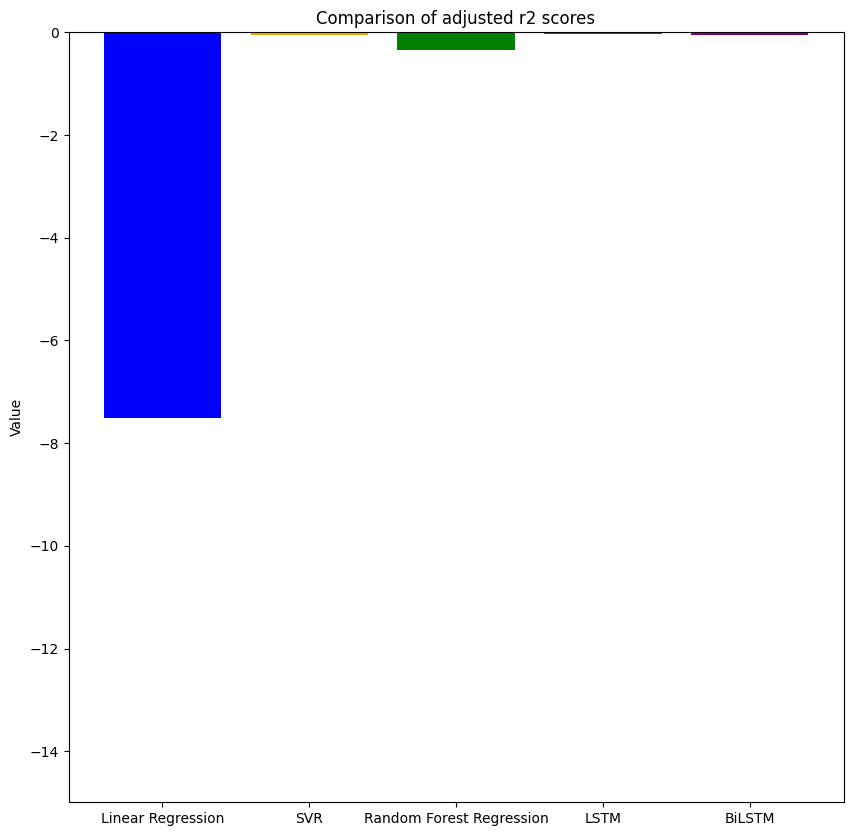

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE, RMSE, and MAE
models = ['Linear Regression', 'SVR', 'Random Forest Regression', 'LSTM', 'BiLSTM']
mse_values = [mse_linear_regression, mse_SVR, mse_RFR, mse_LSTM, mse_biLSTM]
rmse_values = [rmse_linear_regression, rmse_SVR, rmse_RFR, rmse_LSTM, rmse_biLSTM]
mae_values = [mae_linear_regression, mae_SVR, mae_RFR, mae_LSTM, mae_biLSTM]
mape_values = [mape_linear_regression, mape_SVR, mape_RFR, mape_LSTM, mape_biLSTM]
median_ape_values = [median_ape_linear_regression, median_ape_SVR, median_ape_RFR, median_ape_LSTM, median_ape_biLSTM]
r2_values = [r2_linear_regression, r2_SVR, r2_RFR, r2_LSTM, r2_biLSTM]
adjusted_r2_values = [adjusted_r2_linear_regression, adjusted_r2_SVR, adjusted_r2_RFR, adjusted_r2_LSTM, adjusted_r2_biLSTM]

# Create a function to plot the bar graphs
def plot_graph(models, values, title):
    plt.figure(figsize=(10, 10))
    plt.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel('Value')
    min_val = min(values)
    max_val = max(values)
    plt.ylim(min_val - 1 * (max_val - min_val))
    plt.show()

# Plot the MSE, RMSE, and MAE bar graphs
plot_graph(models, mse_values, 'Comparison of MSE')
plot_graph(models, rmse_values, 'Comparison of RMSE')
plot_graph(models, mae_values, 'Comparison of MAE')
plot_graph(models, mape_values, 'Comparison of MAPE')
plot_graph(models, median_ape_values, 'Comparison of Median APE')
plot_graph(models, r2_values, 'Comparison of r2 scores')
plot_graph(models, adjusted_r2_values, 'Comparison of adjusted r2 scores')